# STOCK MARKET DATA VISUALIZATION
This script runs the same information as the `Stock_Market_Data_Analysis.ipynb` file, with the addition of multiple chart types for a portfolio of Big Tech companies (i.e. Google, Facebook, Microsoft). It also is the beginning of the `Fundamental Analysis` project that I will be expanding.

In [114]:
# Import Required Packages
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import io
import pandas as pd
import pandas_datareader.data as web
import pandas.plotting
from pandas.plotting import register_matplotlib_converters
import pandas.testing #pandas.testing.assert_frame_equal
from pandas.testing import assert_frame_equal #assert_frame_equal

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style

import mplfinance as mpf
import mpl_finance as mplf
from mpl_finance import candlestick_ohlc

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

# Steps 1-3: Getting & Using Stock Market Data

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.000000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.000000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.000000  1499.109985   9426900   
2020-07-30  1513.239990  1471.000000  1488.000000  1487.489990   7621000   
2020-07-31  1517.050049  1420.979980  1515.000000  1430.760010  12247000   
2020-08-03  1509.810059  1444.380005  1449.199951  1485.000000   8809300   
2020-08-04  1527.410034  1462.000000  1495.010010  1487.000000   8415000   
2020-08-05  1499.839966  1468.310059  1492.989990  1485.020020   4947800   
2020-08-06  1517.219971  1477.260010  1490.829956  1511.038330   4617448   

              Adj Close  
Date                     
2020-07-24  1417.000000  
2020-07-2

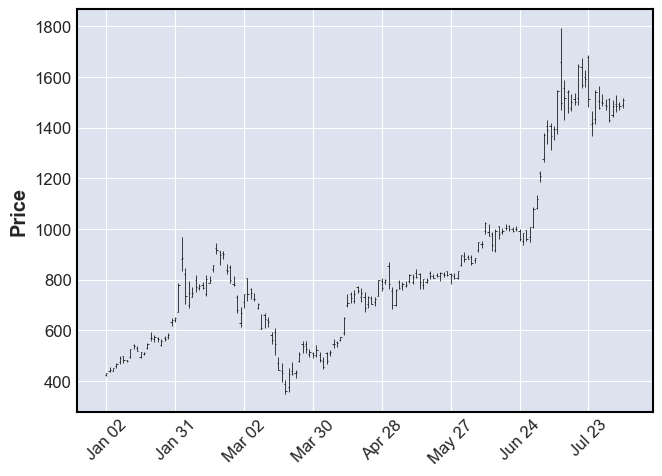

In [115]:
# Parts 1-3: How to Get & Use Stock Market Data

# Here we are using Tesla (ticker = TSLA) as an example.
#df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

print(df.tail(10))

daily = pd.read_csv('tsla.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

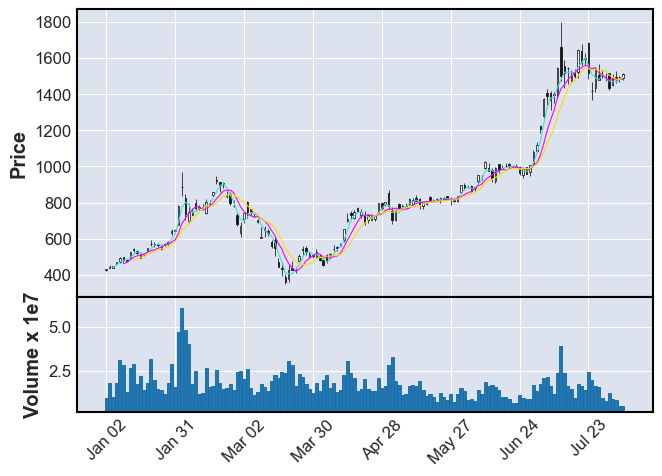

In [116]:
# Example of a Candlestick Chart with 3, 6, 9 Moving Averages, Subplot Showing Volume Bar Chart
mpf.plot(daily, type='candle', mav = (3, 6, 9), volume = True)

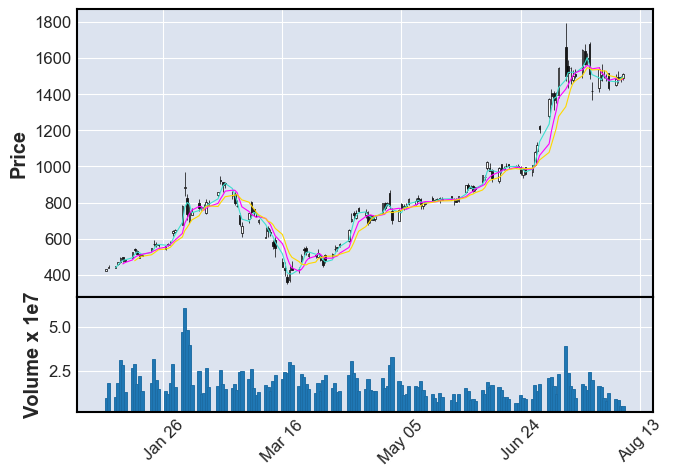

In [117]:
# Example of a Candlestick Chart with 3, 6, 9 Moving Averages (including NonTrading), 
# Subplot Showing Volume Bar Chart
mpf.plot(daily, type = 'candle', mav =(3, 6, 9), volume = True, show_nontrading = True)

In [118]:
# Plot intraday data:
# intraday = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
# intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
# intraday.index.name = 'Date'
# intraday.shape
# intraday.head(3)
# intraday.tail(3)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-07-24  202.860001  197.509995  200.419998  201.300003  39827000.0   
2020-07-27  203.970001  200.860001  201.470001  203.850006  30160900.0   
2020-07-28  204.699997  201.740005  203.610001  202.020004  23251400.0   
2020-07-29  204.649994  202.009995  202.500000  204.059998  19632600.0   
2020-07-30  204.460007  199.570007  201.000000  203.899994  25079600.0   
2020-07-31  205.100006  199.009995  204.399994  205.009995  51248000.0   
2020-08-03  217.639999  210.440002  211.520004  216.539993  78983000.0   
2020-08-04  214.770004  210.309998  214.169998  213.289993  49280100.0   
2020-08-05  215.000000  211.570007  214.899994  212.940002  28806400.0   
2020-08-06  215.520004  211.550003  212.339996  215.429993  21382159.0   

             Adj Close  
Date                    
2020-07-24  201.300003  
2020-07-27  203.850006  
2020-07-28 

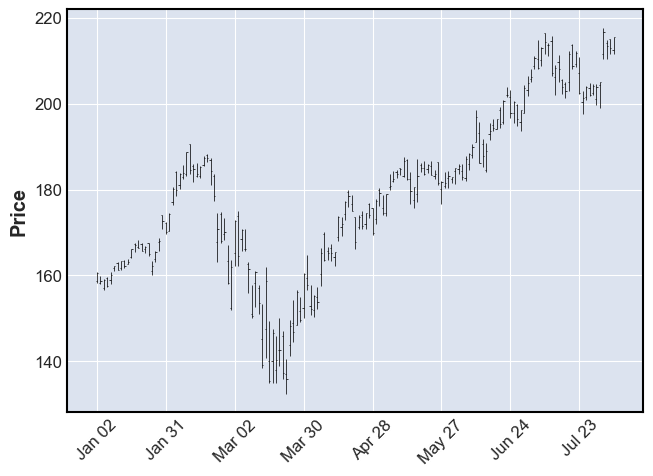

In [119]:
# Example of a Bar Chart for Microsoft (ticker = MSFT)
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('MSFT', 'yahoo', start, end)
df.to_csv('msft.csv')

print(df.tail(10))

daily = pd.read_csv('msft.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

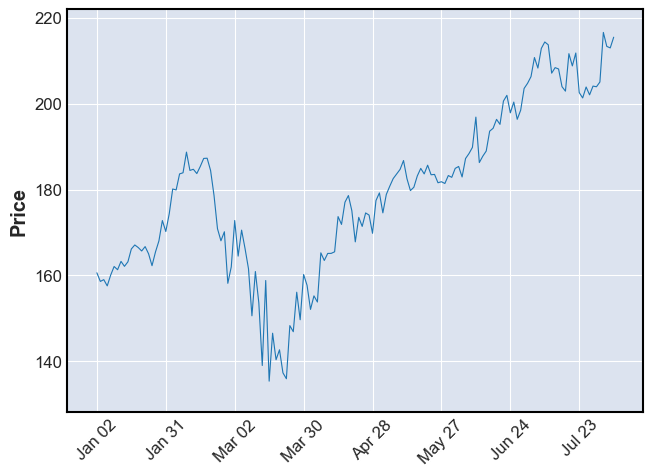

In [120]:
# Example of a Line Graph
mpf.plot(daily, type='line')

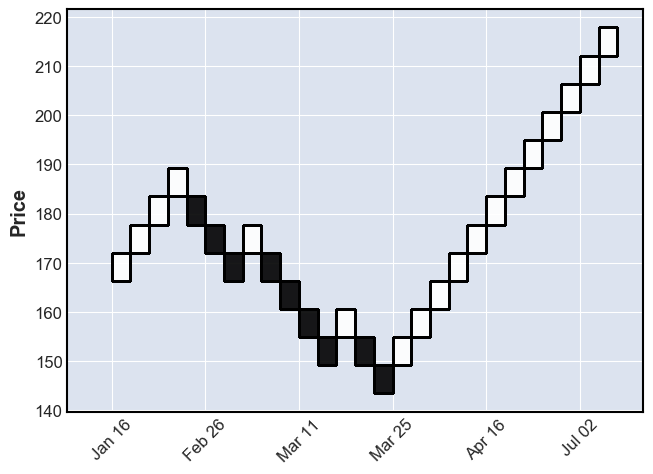

In [121]:
mpf.plot(daily, type='renko')

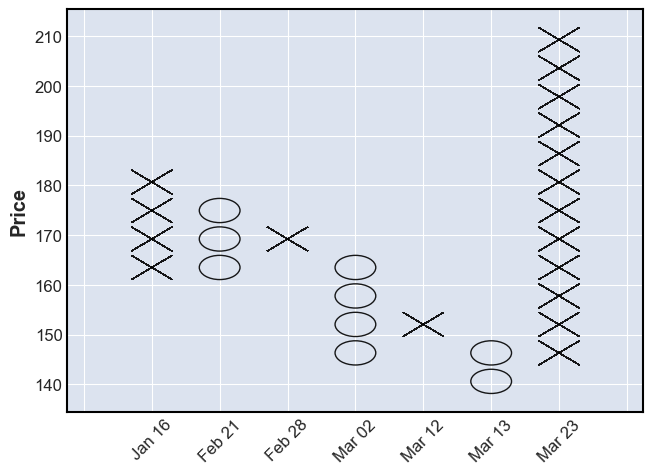

In [122]:
mpf.plot(daily, type='pnf')

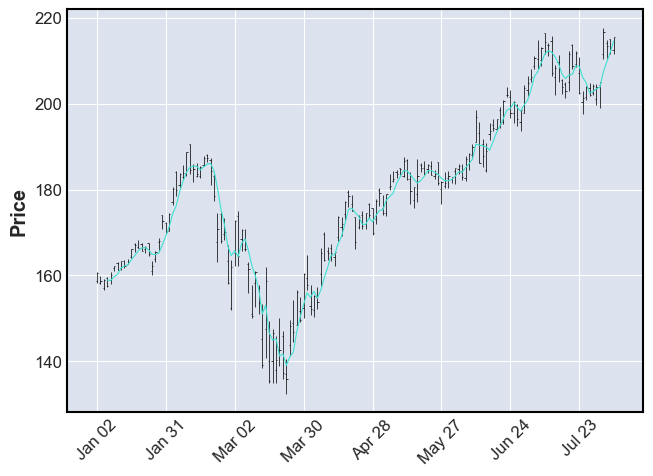

In [123]:
mpf.plot(daily, type = 'ohlc', mav=4)

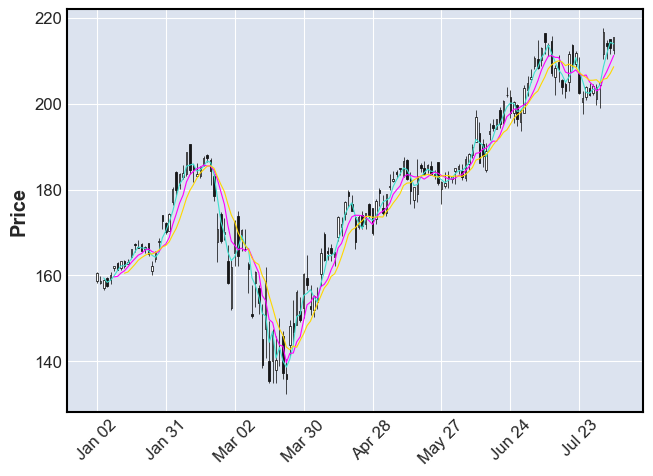

In [124]:
mpf.plot(daily, type='candle', mav=(3,6,9))

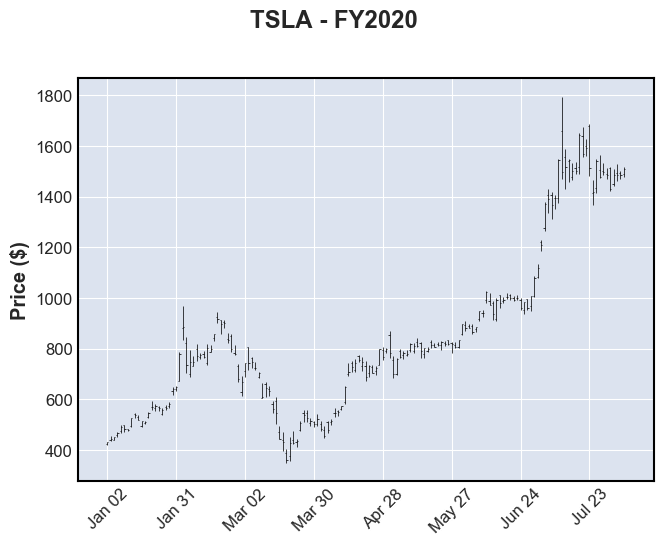

In [125]:
datafile = 'tsla.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Convert dates from string to datetime format
data.index = pd.to_datetime(data.index)
data

mpf.plot(
    data,
    title = 'TSLA - FY2020',
    ylabel = 'Price ($)')

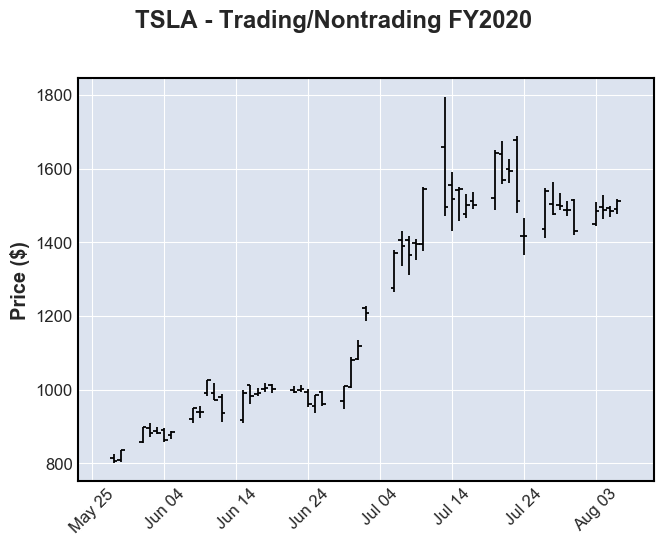

In [126]:
mpf.plot(
    data[-50:],
    title = 'TSLA - Trading/Nontrading FY2020',
    ylabel = 'Price ($)',
    show_nontrading = True)
plt.show()

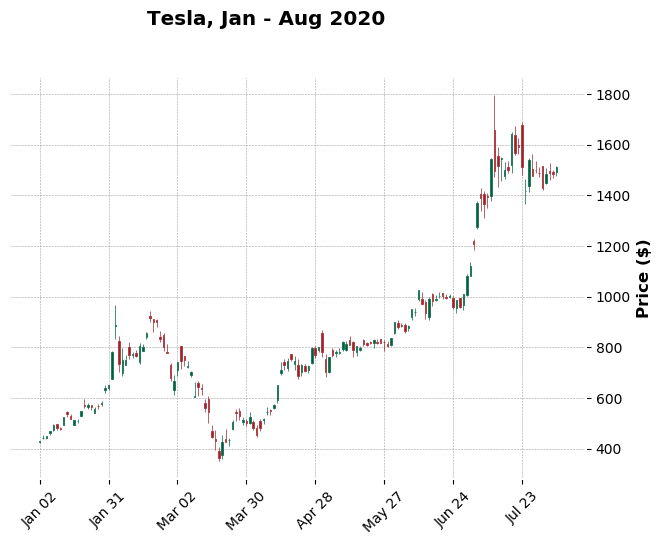

In [127]:
mpf.plot(
    data,
    #data[-50:],
    type ='candle',
    style = 'charles',
    title = 'Tesla, Jan - Aug 2020',
    ylabel = 'Price ($)',
    #show_nontrading = True
)
#    data[-50:], type='candlestick', show_nontrading = True)

In [128]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-31  1517.050049  1420.979980  1515.000000  1430.760010  12247000   
2020-08-03  1509.810059  1444.380005  1449.199951  1485.000000   8809300   
2020-08-04  1527.410034  1462.000000  1495.010010  1487.000000   8415000   
2020-08-05  1499.839966  1468.310059  1492.989990  1485.020020   4947800   
2020-08-06  1517.310059  1477.260010  1490.829956  1511.469971   4618857   

              Adj Close       100ma  
Date                                 
2020-07-31  1430.760010  906.253601  
2020-08-03  1485.000000  914.761301  
2020-08-04  1487.000000  924.025801  
2020-08-05  1485.020020  933.409802  
2020-08-06  1511.469971  944.073801  


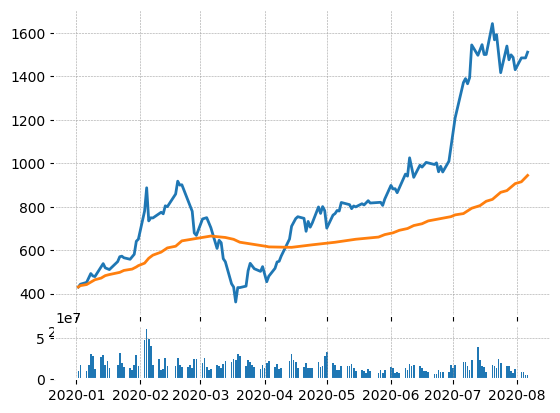

In [129]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [130]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

        Date        open        high         low       close
0 2020-01-02  430.260010  492.140015  430.260010  478.149994
1 2020-01-12  524.859985  547.200012  510.500000  547.200012
2 2020-01-22  569.559998  650.570007  558.020020  650.570007
3 2020-02-01  780.000000  887.059998  734.700012  771.280029
4 2020-02-11  774.380005  917.419983  767.289978  899.409973


In [131]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date        open        high         low       close
0  737426.0  430.260010  492.140015  430.260010  478.149994
1  737436.0  524.859985  547.200012  510.500000  547.200012
2  737446.0  569.559998  650.570007  558.020020  650.570007
3  737456.0  780.000000  887.059998  734.700012  771.280029
4  737466.0  774.380005  917.419983  767.289978  899.409973


In [132]:
df_ohlc.head()

Date        open        high         low       close
0  737426.0  430.260010  492.140015  430.260010  478.149994
1  737436.0  524.859985  547.200012  510.500000  547.200012
2  737446.0  569.559998  650.570007  558.020020  650.570007
3  737456.0  780.000000  887.059998  734.700012  771.280029
4  737466.0  774.380005  917.419983  767.289978  899.409973

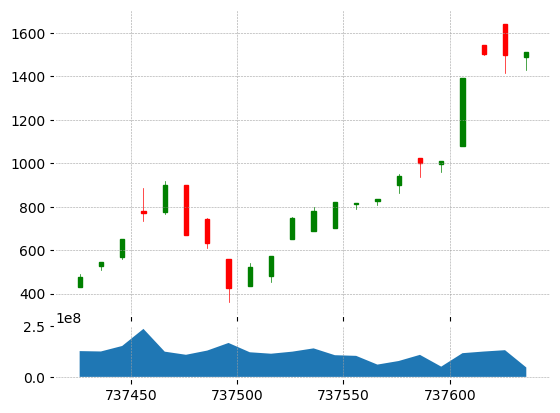

In [133]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

#mplfinance.plot(ax1, df_ohlc.values, width = 2, colorup = 'g')
# only takes one positional argument??
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

# Step 4: Resampling

In [134]:
# Part 4: Resampling the Data for improved accuracy
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.000000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.000000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.000000  1499.109985   9426900   
2020-07-30  1513.239990  1471.000000  1488.000000  1487.489990   7621000   
2020-07-31  1517.050049  1420.979980  1515.000000  1430.760010  12247000   
2020-08-03  1509.810059  1444.380005  1449.199951  1485.000000   8809300   
2020-08-04  1527.410034  1462.000000  1495.010010  1487.000000   8415000   
2020-08-05  1499.839966  1468.310059  1492.989990  1485.020020   4947800   
2020-08-06  1517.310059  1477.260010  1490.829956  1511.469971   4618857   

              Adj Close       100ma  
Date                                 
2020-07-24 

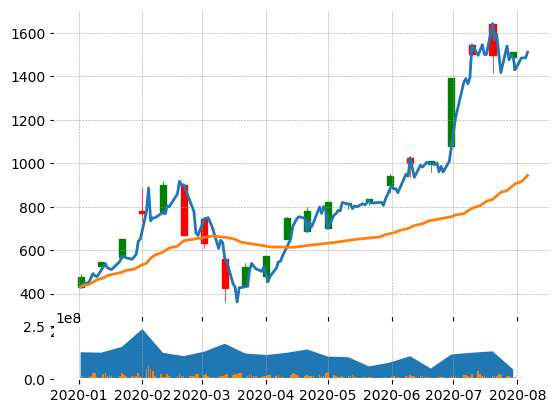

In [135]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

# Step 5: Getting S&P500 List

In [136]:
# Part 5: Getting S&P500 List
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

# Step 6: Getting Stock Prices

In [137]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,5,28)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HRB
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM


# Step 7: Combine S&P500 List & Pricing Data

In [138]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
    mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()  

                  MMM
Date                 
2000-01-03  28.311874
2000-01-04  27.186905
2000-01-05  27.974379
2000-01-06  30.224340
2000-01-07  30.824324
                  MMM       ABT
Date                           
2000-01-03  28.311874  6.564564
2000-01-04  27.186905  6.377004
2000-01-05  27.974379  6.365284
2000-01-06  30.224340  6.588011
2000-01-07  30.824324  6.658342
                  MMM       ABT  ABBV
Date                                 
2000-01-03  28.311874  6.564564   NaN
2000-01-04  27.186905  6.377004   NaN
2000-01-05  27.974379  6.365284   NaN
2000-01-06  30.224340  6.588011   NaN
2000-01-07  30.824324  6.658342   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  28.311874  6.564564   NaN  18.25000
2000-01-04  27.186905  6.377004   NaN  17.81250
2000-01-05  27.974379  6.365284   NaN  18.00000
2000-01-06  30.224340  6.588011   NaN  18.03125
2000-01-07  30.824324  6.658342   NaN  17.93750
                  MM

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.294199  5.336146  44.777622  18.104057  321.250   
2000-01-04  14.625  NaN  27.172190  5.194542  41.357113  17.552309  300.000   
2000-01-05  15.000  NaN  27.464891  5.164732  38.791721  17.655748  283.500   
2000-01-06  16.000  NaN  27.684412  5.269069  37.314693  18.82821

[5 rows x 22 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...     AKAM       ALK       ALB  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  321.250  7.803120  6.324813   
2000-01-04  14.625  NaN  27.172190  ...  300.000  7.705581  6.324813   
2000-01-05  15.000  NaN  27.464891  ...  283.500  7.747382  6.434619   
2000-01-06  16.000  NaN  27.684412  ...  236.125  7.754352  6.654229   
2000-0

[5 rows x 28 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ALLE       LNT        ALL  GOOGL  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...   NaN  5.336293  14.409927    NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  5.336293  13.950034    NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  5.597509  14.563220    NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  5.5975

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        AEE  AAL        AEP        AXP  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  11.942023  NaN  12.473226  34.196667   
2000-01-04  14.625  NaN  27.172190  ...  11.942023  NaN  12.622015  32.905453   
2000-01-05  15.000  NaN  27.464891  ...  12.403996  NaN  13.093165  32.186031   
2000-01-06  16.000  NaN  27.684412  ...  12.357801  NaN

[5 rows x 43 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AMP       ABC       AME       AMGN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  3.107706  1.857676  50.853237   
2000-01-04  14.625  NaN  27.172190  ...  NaN  2.895534  1.851566  46.964756   
2000-01-05  15.000  NaN  27.464891  ...  NaN  3.120188  1.869898  48.580750   
2000-01-06  16.000  NaN  27.684412  ...  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ADI      ANSS  ANTM        AON  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  30.618002  2.765625   NaN  27.607428   
2000-01-04  14.625  NaN  27.172190  ...  29.069048  2.687500   NaN  26.988020   
2000-01-05  15.000  NaN  27.464891  ...  29.493437  2.703125   NaN  27.784399   
2000-01-06  16.000  NaN  27.684412  ...  28.687130  2.7

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      AAPL       AMAT  APTV       ADM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  3.460857  24.005121   NaN  7.004237   
2000-01-04  14.625  NaN  27.172190  ...  3.169071  22.819094   NaN  6.931280   
2000-01-05  15.000  NaN  27.464891  ...  3.215448  21.965160   NaN  6.821836   
2000-01-06  16.000  NaN  27.684412  ...  2.937188  22.000732

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AIZ          T       ATO      ADSK  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  17.282593  8.780582  8.052903   
2000-01-04  14.625  NaN  27.172190  ...  NaN  16.271378  8.561753  7.660817   
2000-01-05  15.000  NaN  27.464891  ...  NaN  16.524181  8.835291  7.178246   
2000-01-06  16.000  NaN  27.684412  ...  NaN  16.175280  8.698522

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        BKR       BLL        BAC  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  10.526615  0.869111  11.966080   
2000-01-04  14.625  NaN  27.172190  ...  10.526615  0.840459  11.255836   
2000-01-05  15.000  NaN  27.464891  ...  10.591587  0.855467  11.379356   
2000-01-06  16.000  NaN  27.684412  ...  11.598760  0.869111  12.352086   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        BDX  BRK.B        BBY  BIO  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  19.089441    NaN  18.150681  NaN   
2000-01-04  14.625  NaN  27.172190  ...  18.588293    NaN  18.032827  NaN   
2000-01-05  15.000  NaN  27.464891  ...  18.724966    NaN  17.914955  NaN   
2000-01-06  16.000  NaN  27.684412  ...  19.499475    NaN  17.757807  NaN  

[5 rows x 80 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         BA     BKNG       BWA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  25.741438  307.500  2.292869   
2000-01-04  14.625  NaN  27.172190  ...  25.701408  324.000  2.292869   
2000-01-05  15.000  NaN  27.464891  ...  27.302753  359.625  2.303982   
2000-01-06  16.000  NaN  27.684412  ...  27.582977  345.000  2.274348   


[5 rows x 89 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      CHRW       COG     CDNS  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  6.855355  0.686059  22.0625   
2000-01-04  14.625  NaN  27.172190  ...  6.625382  0.665796  22.0000   
2000-01-05  15.000  NaN  27.464891  ...  6.537773  0.677375  21.6250   
2000-01-06  16.000  NaN  27.684412  ...  6.570628  0.691849  20.9375   
2000-0

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CARR        CAT  CBOE  CBRE  CDW  CE  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  11.845388   NaN   NaN  NaN NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  11.693136   NaN   NaN  NaN NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  11.967190   NaN   NaN  NaN NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  12.57620

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CNC       CNP        CTL      CERN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.079404  16.096891  2.527873   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.147709  15.452129  2.481490   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.403867  15.563292  2.481490   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6.438023  15.385429

[5 rows x 109 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CHTR        CVX  CMG        CB  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   NaN  17.167484  NaN  7.325750   
2000-01-04  14.625  NaN  27.172190  ...   NaN  17.167484  NaN  7.269614   
2000-01-05  15.000  NaN  27.464891  ...   NaN  17.475414  NaN  6.848598   
2000-01-06  16.000  NaN  27.684412  ...   NaN  18.219591  NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       CTAS       CSCO           C  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  27.019138  41.433525  326.904785   
2000-01-04  14.625  NaN  27.172190  ...  25.920277  39.109055  306.858734   
2000-01-05  15.000  NaN  27.464891  ...  26.211151  38.989223  319.194885   
2000-01-06  16.000  NaN  27.684412  ...  26.356592  38.342190  334.614807  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CME        CMS         KO      CTSH  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  NaN  15.633080  12.015392  1.922517   
2000-01-04  14.625  NaN  27.172190  ...  NaN  15.831815  12.028710  1.857432   
2000-01-05  15.000  NaN  27.464891  ...  NaN  16.262384  12.135282  1.960066   
2000-01-06  16.000  NaN  27.684412  ...  NaN  16.129894  12.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      CMCSA        CMA       CAG  CXO  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  12.436954  24.774324  8.767573  NaN   
2000-01-04  14.625  NaN  27.172190  ...  11.505847  23.742056  8.599883  NaN   
2000-01-05  15.000  NaN  27.464891  ...  11.206564  23.673237  8.456153  NaN   
2000-01-06  16.000  NaN  27.684412  ...  11.638860  24.36142

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       STZ        COO      CPRT  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  5.836346  14.346992  3.250000   
2000-01-04  14.625  NaN  27.172190  ...  5.616660  14.468577  2.843750   
2000-01-05  15.000  NaN  27.464891  ...  5.807055  14.559765  2.822917   
2000-01-06  16.000  NaN  27.684412  ...  6.034063  14.559765  2.625000   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  COTY        CCI       CSX       CMI  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN  24.362835  3.501594  4.169108   
2000-01-04  14.625  NaN  27.172190  ...   NaN  24.337896  3.395484  4.053454   
2000-01-05  15.000  NaN  27.464891  ...   NaN  23.988785  3.466223  4.058960   
2000-01-06  16.000  NaN  27.684412  ...   NaN  23.140949  3.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       DHR       DRI       DVA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  5.401667  6.254695  2.291667   
2000-01-04  14.625  NaN  27.172190  ...  5.205636  6.209535  2.250000   
2000-01-05  15.000  NaN  27.464891  ...  5.263720  6.435337  2.062500   
2000-01-06  16.000  NaN  27.684412  ...  5.321804  6.367594  2.000000   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DVN  DXCM  FANG  DLR  DFS  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  13.206322   NaN   NaN  NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  12.925879   NaN   NaN  NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  13.155335   NaN   NaN  NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  13.818199   NaN   NaN  NaN  NaN   
2000

[5 rows x 157 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  DISCK       DISH  DG       DLTR  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...    NaN  33.913342 NaN  10.861111   
2000-01-04  14.625  NaN  27.172190  ...    NaN  32.666359 NaN  10.847222   
2000-01-05  15.000  NaN  27.464891  ...    NaN  32.555019 NaN  10.861111   
2000-01-06  16.000  NaN  27.684412  ...    NaN  29.281706

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DUK       DRE         DD  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  21.758743  6.057658  37.837978   
2000-01-04  14.625  NaN  27.172190  ...  22.096954  6.017806  36.803764   
2000-01-05  15.000  NaN  27.464891  ...  22.998890  6.037733  37.998447   
2000-01-06  16.000  NaN  27.684412  ...  23.618952  6.177219  39.068329   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       ETN      EBAY        ECL  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  2.688206  7.287086  14.673091   
2000-01-04  14.625  NaN  27.172190  ...  2.596401  6.603519  14.283750   
2000-01-05  15.000  NaN  27.464891  ...  2.617585  7.045258  14.843422   
2000-01-06  16.000  NaN  27.684412  ...  2.671727  6.958200  15.500422   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        EFX  EQIX       EQR        ESS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  10.907270   NaN  7.484406  15.226315   
2000-01-04  14.625  NaN  27.172190  ...  10.541660   NaN  7.428960  15.054901   
2000-01-05  15.000  NaN  27.464891  ...  10.419790   NaN  7.584192  14.997775   
2000-01-06  16.000  NaN  27.684412  ...  10.297920   Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      EXPD  EXR        XOM      FFIV  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  8.927643  NaN  21.139345  59.75000   
2000-01-04  14.625  NaN  27.172190  ...  8.779065  NaN  20.734442  58.96875   
2000-01-05  15.000  NaN  27.464891  ...  8.804903  NaN  21.864794  55.40625   
2000-01-06  16.000  NaN  27.684412  ...  8.850121  NaN  22.995153

[5 rows x 200 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       FITB        FE  FRC      FISV  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  27.507853  8.814839  NaN  6.354167   
2000-01-04  14.625  NaN  27.172190  ...  26.351439  8.814839  NaN  5.916667   
2000-01-05  15.000  NaN  27.464891  ...  25.957760  9.139463  NaN  6.328125   
2000-01-06  16.000  NaN  27.684412  ...  2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FTNT  FTV  FBHS  FOXA  FOX       BEN  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  NaN   NaN   NaN  NaN  6.348482   
2000-01-04  14.625  NaN  27.172190  ...   NaN  NaN   NaN   NaN  NaN  6.235785   
2000-01-05  15.000  NaN  27.464891  ...   NaN  NaN   NaN   NaN  NaN  6.335961   
2000-01-06  16.000  NaN  27.684412  ...   NaN  NaN   Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  GRMN      IT         GD         GE  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN  16.625  16.108694  25.534224   
2000-01-04  14.625  NaN  27.172190  ...   NaN  15.375  16.785870  24.512873   
2000-01-05  15.000  NaN  27.464891  ...   NaN  14.750  17.935028  24.470304   
2000-01-06  16.000  NaN  27.684412  ...   NaN  14.750  17.996588 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  GPN         GS        GWW       HRB  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  NaN  70.332672  31.934031  4.680020   
2000-01-04  14.625  NaN  27.172190  ...  NaN  65.902657  31.021645  4.554098   
2000-01-05  15.000  NaN  27.464891  ...  NaN  62.816559  31.456114  4.980827   
2000-01-06  16.000  NaN  27.684412  ...  NaN  65.504456  31.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      HSIC        HSY        HES  HPE  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  2.475490  13.235672  11.411185  NaN   
2000-01-04  14.625  NaN  27.172190  ...  2.352941  12.736210  11.188725  NaN   
2000-01-05  15.000  NaN  27.464891  ...  2.500000  12.789721  11.097116  NaN   
2000-01-06  16.000  NaN  27.684412  ...  2.487745  13.128642

[5 rows x 245 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       HRL       HST  HWM        HPQ  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  1.643118  4.358634  NaN  10.766153   
2000-01-04  14.625  NaN  27.172190  ...  1.620156  4.326347  NaN   9.952532   
2000-01-05  15.000  NaN  27.464891  ...  1.645669  4.164915  NaN   9.889507   
2000-01-06  16.000  NaN  27.684412  ...  1

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  INFO        ITW  ILMN       INCY  IR  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  19.242121   NaN  44.828125 NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  18.376034   NaN  46.625000 NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  18.601973   NaN  42.984375 NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  18.47016

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        IPG        IFF       INTU  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  40.313938  22.768127  27.455267   
2000-01-04  14.625  NaN  27.172190  ...  37.112949  22.488022  27.740072   
2000-01-05  15.000  NaN  27.464891  ...  36.277905  22.688107  35.743107   
2000-01-06  16.000  NaN  27.684412  ...  36.370689  23.208284  31.898235   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       JKHY         J      JBHT  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  10.634753  7.726096  2.795751   
2000-01-04  14.625  NaN  27.172190  ...   9.769133  7.680737  2.652712   
2000-01-05  15.000  NaN  27.464891  ...   9.966991  7.726096  2.678720   
2000-01-06  16.000  NaN  27.684412  ...   9.868058  7.763896  2.756741   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        KSU          K        KEY  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  65.806404  16.248468  10.688341   
2000-01-04  14.625  NaN  27.172190  ...  62.422760  15.670599  10.559573   
2000-01-05  15.000  NaN  27.464891  ...  60.497585  15.534624  10.366411   
2000-01-06  16.000  NaN  27.684412  ...  62.422760  15.670599  10.752731   
2000

[5 rows x 288 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  KHC        KR        LB       LHX  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.489871  7.874387  8.721471   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.704060  7.716657  8.385221   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.811152  7.607459  8.301151   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LVS        LEG  LDOS       LEN  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.075068   NaN  5.978436   
2000-01-04  14.625  NaN  27.172190  ...  NaN   9.554474   NaN  5.931546   
2000-01-05  15.000  NaN  27.464891  ...  NaN   9.554474   NaN  5.954991   
2000-01-06  16.000  NaN  27.684412  ...  NaN   9.523849   NaN  5.954991   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        LMT         L        LOW  LYB  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  12.144202  8.329817  10.516467  NaN   
2000-01-04  14.625  NaN  27.172190  ...  12.556508  8.276928   9.950560  NaN   
2000-01-05  15.000  NaN  27.464891  ...  12.631470  8.224044   9.938770  NaN   
2000-01-06  16.000  NaN  27.684412  ...  12.818884  8.171153

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  MKTX        MAR        MMC  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...   NaN  11.590939  26.990477   
2000-01-04  14.625  NaN  27.172190  ...   NaN  11.519688  25.777422   
2000-01-05  15.000  NaN  27.464891  ...   NaN  11.709705  24.849794   
2000-01-06  16.000  NaN  27.684412  ...   NaN  11.875965  26.659546   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MCD        MCK        MDT  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  23.817707  19.955185  24.943438   
2000-01-04  14.625  NaN  27.172190  ...  23.329338  18.678059  25.125523   
2000-01-05  15.000  NaN  27.464891  ...  23.705008  18.890911  26.704069   
2000-01-06  16.000  NaN  27.684412  ...  23.366909  20.221256  27.706591   
2000

[5 rows x 327 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MU       MSFT       MAA  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  37.96875  37.289700  7.268247   
2000-01-04  14.625  NaN  27.172190  ...  36.50000  36.030037  7.308624   
2000-01-05  15.000  NaN  27.464891  ...  36.37500  36.409924  7.227864   
2000-01-06  16.000  NaN  27.684412  ...  37.00000  35.190277  7.349

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MCO         MS        MOS  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  8.182575  38.990582  13.199550   
2000-01-04  14.625  NaN  27.172190  ...  7.946084  36.102390  12.904040   
2000-01-05  15.000  NaN  27.464891  ...  7.804188  34.784649  13.396564   
2000-01-06  16.000  NaN  27.684412  ...  7.804188  35.452534  13.593571   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       NTAP  NFLX        NWL  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...  36.342716   NaN  15.215063   
2000-01-04  14.625  NaN  27.172190  ...  31.746449   NaN  15.592018   
2000-01-05  15.000  NaN  27.464891  ...  33.510132   NaN  15.352143   
2000-01-06  16.000  NaN  27.684412  ...  29.956018   NaN  15.660553   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NLSN       NKE        NI       NBL  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN  1.819597  2.819523  3.600099   
2000-01-04  14.625  NaN  27.172190  ...   NaN  1.720346  2.849518  3.477872   
2000-01-05  15.000  NaN  27.464891  ...   NaN  1.819597  2.969497  3.444537   
2000-01-06  16.000  NaN  27.684412  ...   NaN  1.810144  2.949502

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NRG       NUE      NVDA      NVR  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.318145  3.590438  46.5625   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.252708  3.494565  46.0000   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.427203  3.379518  45.8750   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6.485368  3.159011  45.8750  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       OKE       ORCL  OTIS      PCAR  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  1.100867  25.591290   NaN  4.339079   
2000-01-04  14.625  NaN  27.172190  ...  1.087002  23.330050   NaN  4.139580   
2000-01-05  15.000  NaN  27.464891  ...  1.098094  22.097868   NaN  4.307909   
2000-01-06  16.000  NaN  27.684412  ...  1.098094  20.797998

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PAYC  PYPL       PNR      PBCT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  5.890952  1.810835   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  5.799384  1.805414   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  5.890952  1.816257   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  5.860430  1.799992   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PM  PSX        PNW       PXD  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ... NaN  NaN  12.105463  7.975256   
2000-01-04  14.625  NaN  27.172190  ... NaN  NaN  12.258056  8.093408   
2000-01-05  15.000  NaN  27.464891  ... NaN  NaN  12.588662  7.857108   
2000-01-06  16.000  NaN  27.684412  ... NaN  NaN  12.664960  8.034334   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PFG         PG       PGR       PLD  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  28.391300  3.510027  8.691907   
2000-01-04  14.625  NaN  27.172190  ...  NaN  27.844984  3.382783  8.554814   
2000-01-05  15.000  NaN  27.464891  ...  NaN  27.315243  3.463474  8.445135   
2000-01-06  16.000  NaN  27.684412  ...  NaN  28.573389  3.451060

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       PVH  QRVO        PWR       QCOM  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  7.058062   NaN  18.654486  62.936359   
2000-01-04  14.625  NaN  27.172190  ...  6.775739   NaN  18.613127  56.881840   
2000-01-05  15.000  NaN  27.464891  ...  6.662811   NaN  18.902664  54.907513   
2000-01-06  16.000  NaN  27.684412  ...  6.832205   NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        RTX         O       REG  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  12.899742  3.221045  7.506075   
2000-01-04  14.625  NaN  27.172190  ...  12.370852  3.182238  7.529604   
2000-01-05  15.000  NaN  27.464891  ...  12.125756  3.162835  7.482544   
2000-01-06  16.000  NaN  27.684412  ...  12.706249  3.201642  7.529604   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        RHI        ROK       ROL  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  10.475074  11.691692  0.438953   
2000-01-04  14.625  NaN  27.172190  ...   9.912652  11.262503  0.435340   
2000-01-05  15.000  NaN  27.464891  ...   9.725178  11.321700  0.433534   
2000-01-06  16.000  NaN  27.684412  ...   9.725178  11.099705  0.437147   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SBAC        SLB  STX        SEE  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  17.917931  18.658325  NaN  19.682228   
2000-01-04  14.625  NaN  27.172190  ...  17.669069  18.403605  NaN  20.436514   
2000-01-05  15.000  NaN  27.464891  ...  16.922489  18.361147  NaN  20.436514   
2000-01-06  16.000  NaN  27.684412  ...  16.860275  19.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SPG       SWKS        SLG  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  8.037941  28.752079  11.161804   
2000-01-04  14.625  NaN  27.172190  ...  7.949121  27.064148  11.000039   
2000-01-05  15.000  NaN  27.464891  ...  8.015734  27.765066  10.902983   
2000-01-06  16.000  NaN  27.684412  ...  8.215574  25.061514  11.097099   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        STT       STE        SYK  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  25.467466  8.181990  14.256066   
2000-01-04  14.625  NaN  27.172190  ...  24.052601  7.927893  14.099688   
2000-01-05  15.000  NaN  27.464891  ...  24.486187  7.877072  14.529713   
2000-01-06  16.000  NaN  27.684412  ...  25.513100  8.029531  14.842464   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       TROW      TTWO  TPR        TGT  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  10.995634  9.124436  NaN  24.629271   
2000-01-04  14.625  NaN  27.172190  ...  10.663034  8.874452  NaN  23.561226   
2000-01-05  15.000  NaN  27.464891  ...  10.643468  8.832788  NaN  23.027193   
2000-01-06  16.000  NaN  27.684412  ...  10.956511  8.749459

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TXN        TXT        TMO  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  36.574970  24.218569  12.402374   
2000-01-04  14.625  NaN  27.172190  ...  35.019547  23.814602  11.937287   
2000-01-05  15.000  NaN  27.464891  ...  34.175152  23.249025  12.040640   
2000-01-06  16.000  NaN  27.684412  ...  33.241901  22.946039  12.040640   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TRV        TFC  TWTR  TYL  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  19.621847  12.632176   NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  19.361706  12.265133   NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  19.213058  12.418066   NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  19.584684  12.999200   NaN  NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ULTA        USB  UAA  UA       UNP  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN  10.688401  NaN NaN  4.378635   
2000-01-04  14.625  NaN  27.172190  ...   NaN  10.298549  NaN NaN  4.372283   
2000-01-05  15.000  NaN  27.464891  ...   NaN  10.071136  NaN NaN  4.372283   
2000-01-06  16.000  NaN  27.684412  ...   NaN  10.850838  NaN NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      URI       UHS        UNM  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  16.6875  8.208087  19.676989   
2000-01-04  14.625  NaN  27.172190  ...  16.5000  8.042828  19.314087   
2000-01-05  15.000  NaN  27.464891  ...  16.4375  8.373354  18.668941   
2000-01-06  16.000  NaN  27.684412  ...  17.3750  8.993091  19.072153   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       VTR        VRSN  VRSK  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...  1.540800  161.444855   NaN   
2000-01-04  14.625  NaN  27.172190  ...  1.540800  159.958847   NaN   
2000-01-05  15.000  NaN  27.464891  ...  1.516724  151.148895   NaN   
2000-01-06  16.000  NaN  27.684412  ...  1.540800  131.724564   NaN   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        VMC       WRB       WAB  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  28.422752  1.400169  7.870015   
2000-01-04  14.625  NaN  27.172190  ...  28.332516  1.357087  7.755545   
2000-01-05  15.000  NaN  27.464891  ...  30.227381  1.335547  7.726925   
2000-01-06  16.000  NaN  27.684412  ...  30.272488  1.413094  7.412125   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       WAT       WEC       WFC  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  25.75000  3.371912  9.072605   
2000-01-04  14.625  NaN  27.172190  ...  24.50000  3.394022  8.623325   
2000-01-05  15.000  NaN  27.464891  ...  26.03125  3.548799  8.536361   
2000-01-06  16.000  NaN  27.684412  ...  25.25000  3.537743  8.913179   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  WU  WRK         WY        WHR  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ... NaN  NaN  36.431850  36.692276   
2000-01-04  14.625  NaN  27.172190  ... NaN  NaN  35.063206  35.282478   
2000-01-05  15.000  NaN  27.464891  ... NaN  NaN  36.920658  35.801876   
2000-01-06  16.000  NaN  27.684412  ... NaN  NaN  38.647736  36.098686   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  WYNN       XEL        XRX       XLNX  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  7.782174  44.165188  33.290680   
2000-01-04  14.625  NaN  27.172190  ...   NaN  7.961369  42.111004  32.534081   
2000-01-05  15.000  NaN  27.464891  ...   NaN  8.268555  44.279305  31.821962   
2000-01-06  16.000  NaN  27.684412  ...   NaN  8.191765

# Step 8: Correlation Tables & Data Visualization

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.893848  0.862120  0.832640  0.930201  0.938559  0.823938   
ABT   0.893848  1.000000  0.806988  0.836211  0.982118  0.900945  0.952547   
ABBV  0.862120  0.806988  1.000000  0.850518  0.875118  0.909621  0.862596   
ABMD  0.832640  0.836211  0.850518  1.000000  0.867029  0.895612  0.888976   
ACN   0.930201  0.982118  0.875118  0.867029  1.000000  0.938155  0.949020   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.037064  0.881063 -0.159754  ...  0.746969  0.911468  0.246536   
ABT   0.252216  0.834071 -0.058714  ...  0.673071  0.978129  0.228969   
ABBV  0.691711  0.246887  0.517504  ...  0.153361  0.802830  0.470043   
ABMD  0.297080  0.681719  0.036234  ...  0.531448  0.823052  0.226332   
ACN   0.374544  0.852527  0.328854  ...  0.682904  0.987345  0.342631   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.778798 

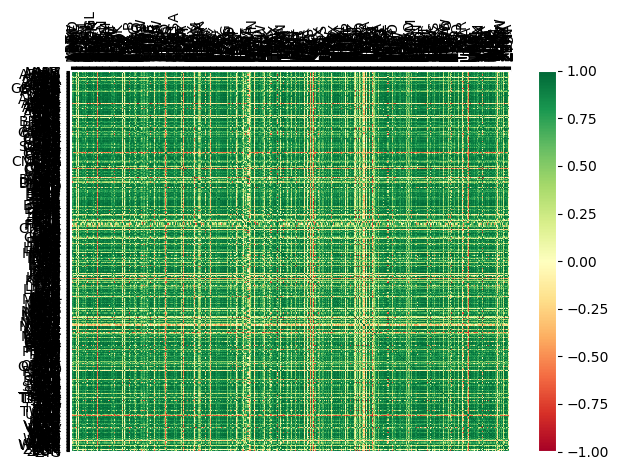

In [139]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

# Next create features/labels, use ML for trading strategy & possible investments.	

# Step 9: Preprocessing Data for Machine Learning (ML) Model
# Step 10: Setting Target
# Step 11: Generate Labels

In [140]:
# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: /
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learnings: Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

## Create features/labels
Use ML for trading strategy & possible investments.	

In [141]:
# Create features/labels, use ML for trading strategy & possible investments.	
# Theory: groups of companies might move up/down together (using pricing data).
# Take S&P500 dataset (closing price over time, 2000-2020), use machine learning.
# Normalize dataset by converting pricing data to % change
# Features = define, labels = target
# Labels = Buy, Sell, or Hold

# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at " " company (ticker = " ")
process_data_for_labels('BAC')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BRK.B',
  'BBY',
  'BIO',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BF.B',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  '

In [142]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

# Step 11 ML Labels

In [143]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397349 , -0.0285716 ,  0.        , ...,  0.        ,
         -0.04842362,  0.        ],
        [ 0.02896518, -0.00183788,  0.        , ...,  0.        ,
         -0.00118324,  0.        ],
        ...,
        [ 0.00876118,  0.02119695, -0.00010959, ...,  0.0213796 ,
          0.06502401, -0.0074438 ],
        [-0.0161932 ,  0.00333004,  0.02006793, ..., -0.0363349 ,
         -0.01253218, -0.02257383],
        [ 0.00432072,  0.01194824, -0.00989033, ...,  0.01147542,
         -0.01757237, -0.00168803]]),
 array([-1,  1,  1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   28.311874   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   27.186905   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   27.974379   6.3

# Create new Machine Learning function

In [144]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# clf = neighbors.KNeighborsClassifier()
#
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))
#
# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

# Step 12: ML Algorithm with Voting Classifier 

In [145]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()a
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


C:\Users\JCW\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.4091971940763835
Predicted spread: Counter({0: 782, -1: 251, 1: 250})


0.4091971940763835

# STOCK MARKET DATA VISUALIZATION

In [146]:
# Loading data into dataframe:
datafile = 'MSFT.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]


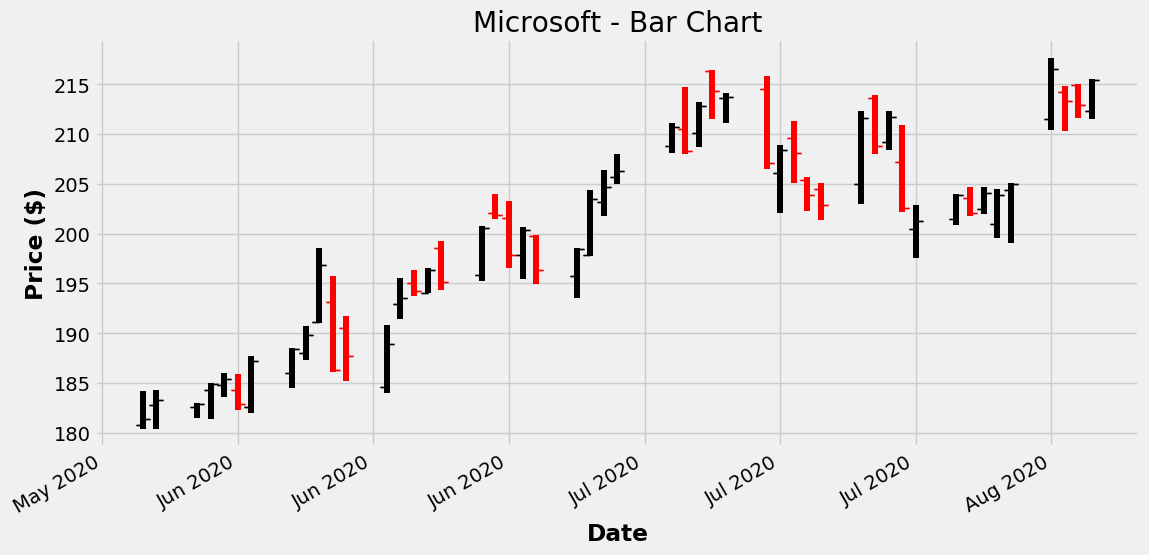

In [147]:
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

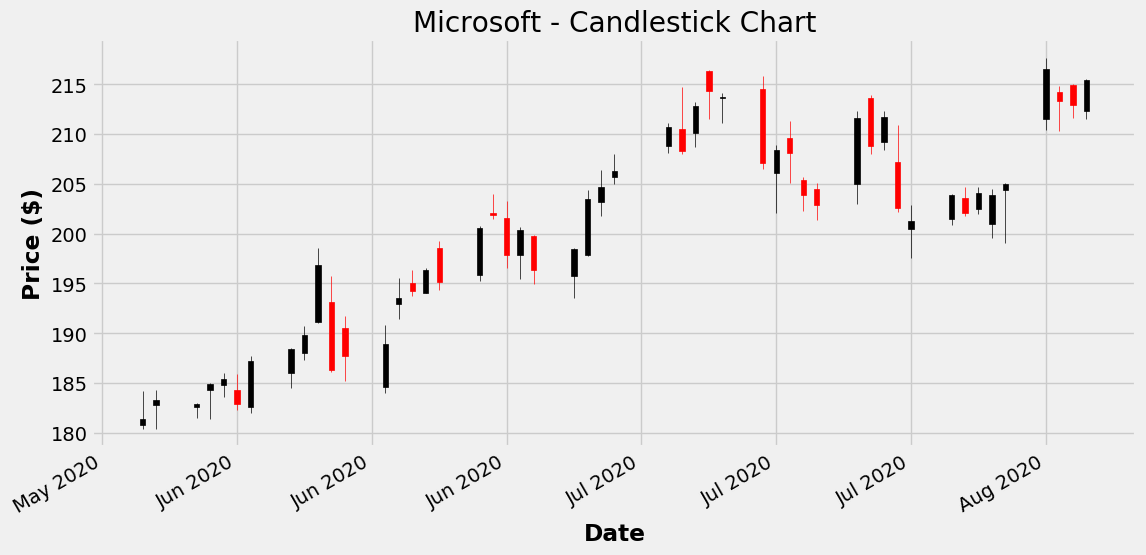

In [148]:
# Candlestick Chart (Microsoft, ticker = MSFT)
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

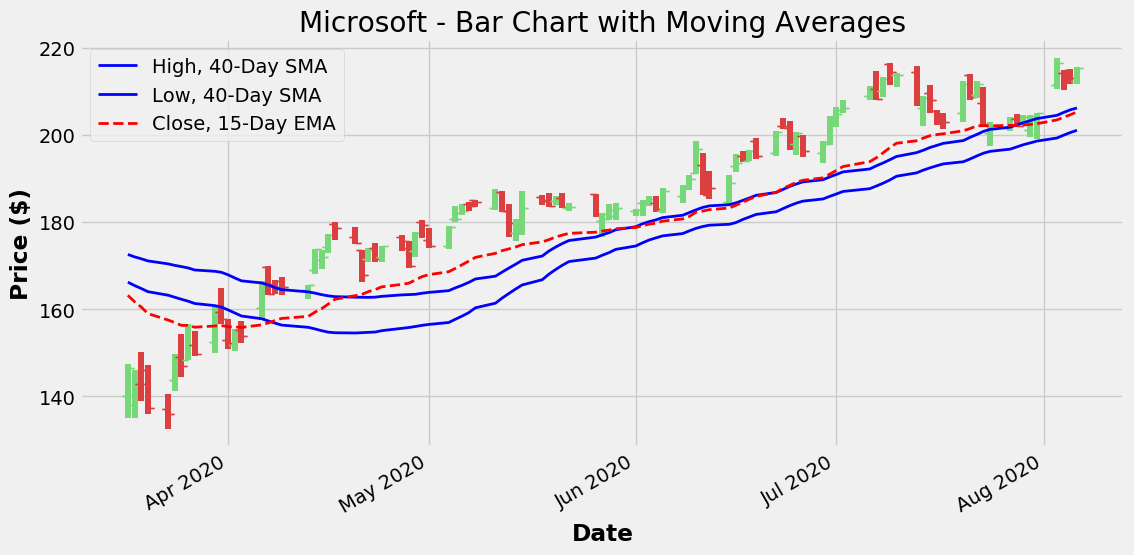

In [149]:
# Bar Chart with Moving Averages - Loading data into dataframe for Microsoft (ticker = MSFT):
datafile = 'msft.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


# Stock Portolio - Big Tech
The next couple of cells will show data visualizations (Bar Charts with Non-Trading Days, Candlestick Charts, and Bar Charts with Moving Averages) for a portfolio of mid- to large-cap tech stocks.

Note: Not all companies are in the Technology Sector, but fall into a tech-related industry/subindustry. 

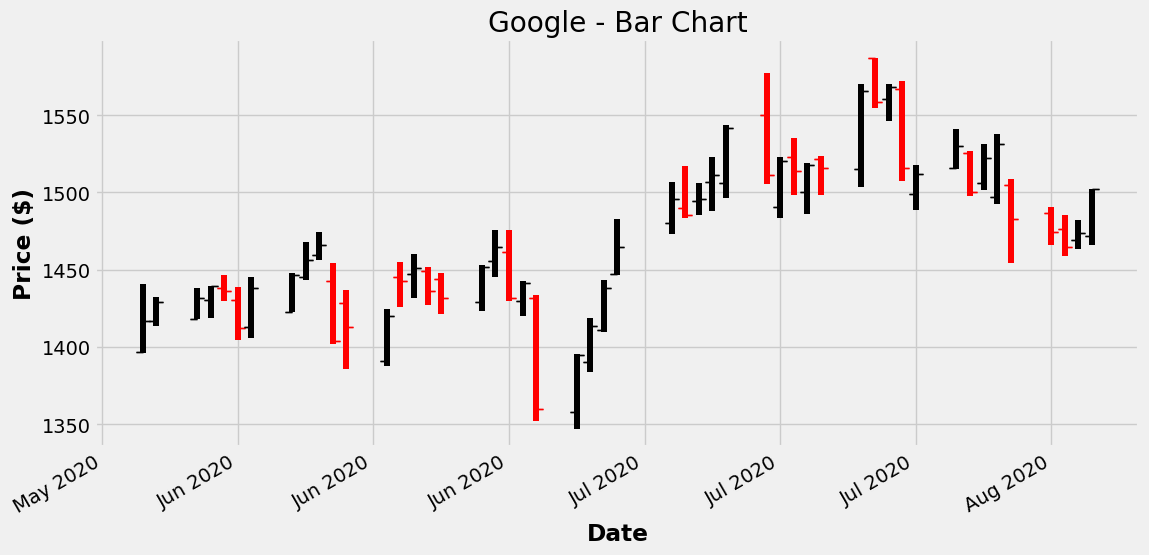

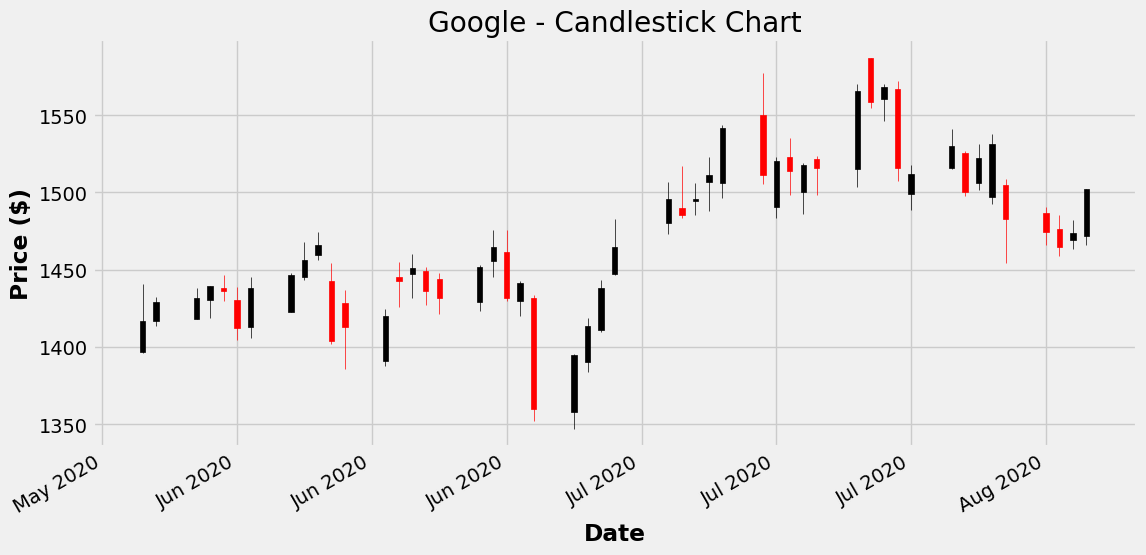

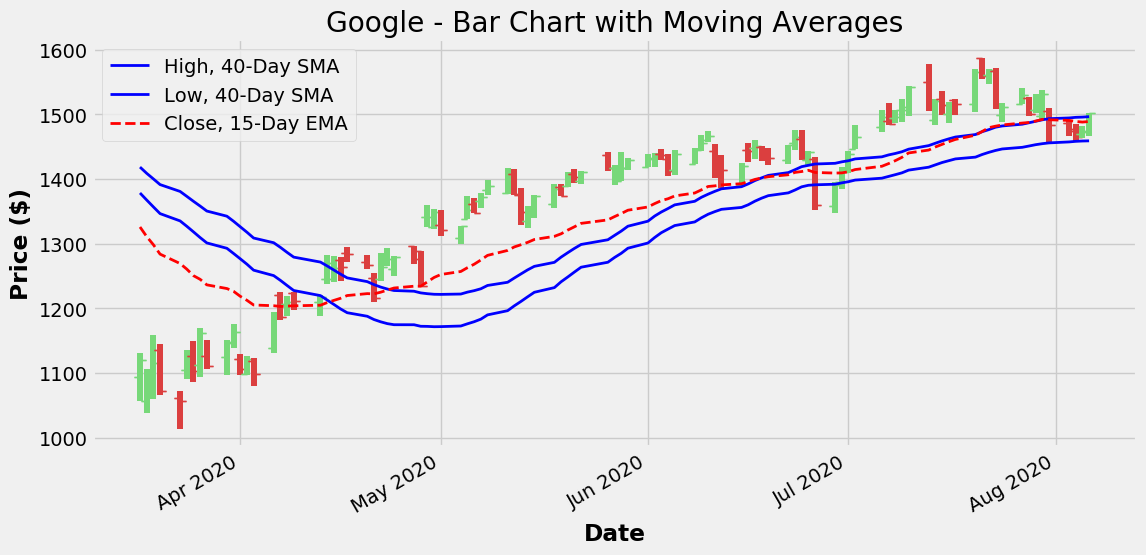

In [155]:
# Bar Chart - Loading data into dataframe for Google (ticker = GOOG):
df = web.DataReader('GOOG', 'yahoo', start, end)
df.to_csv('goog.csv')
df = pd.read_csv('goog.csv', parse_dates = True, index_col = 'Date')

datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Candlestick Chart (Google, ticker = GOOGL)
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
# Loading data into dataframe for Google (ticker = GOOG):
datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

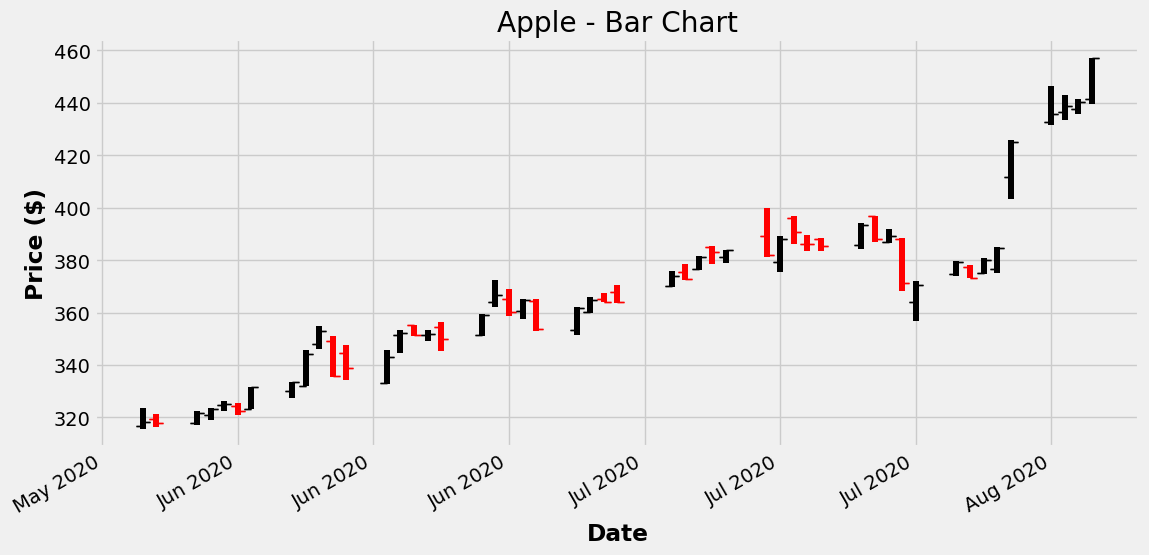

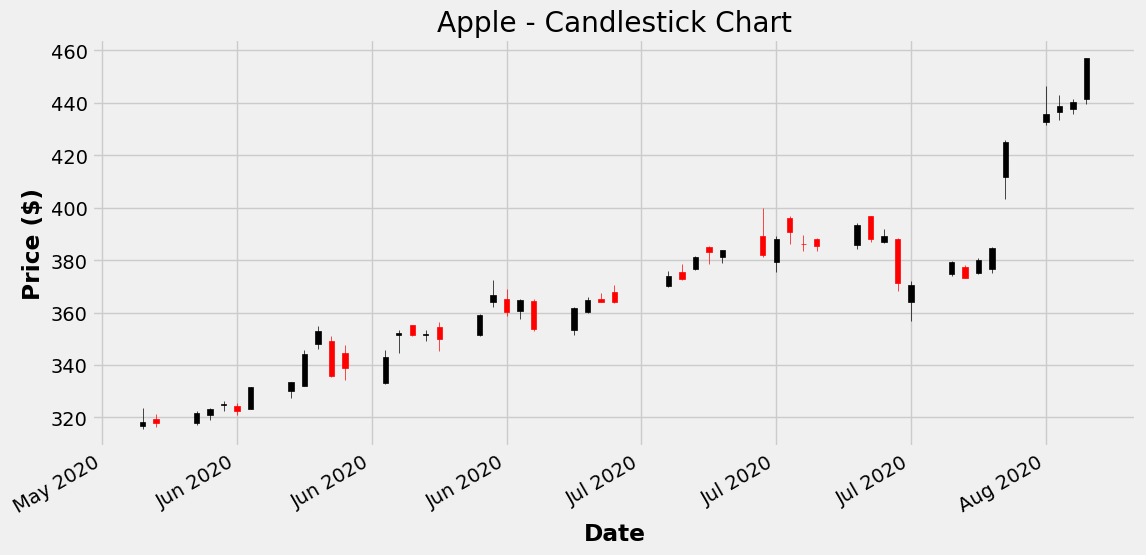

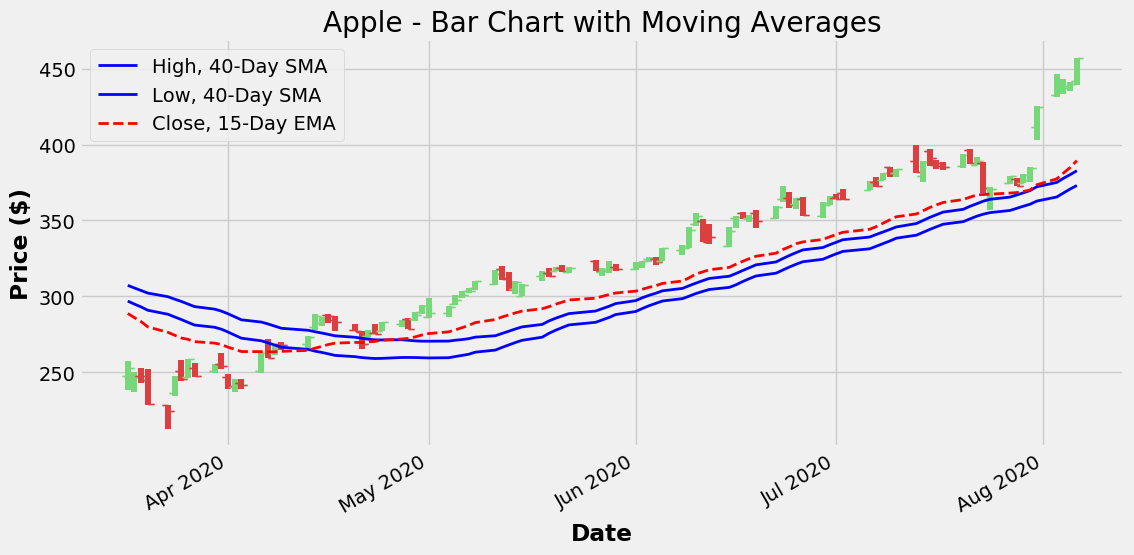

In [156]:
# Loading data into dataframe for Apple (ticker = AAPL):
df = web.DataReader('AAPL', 'yahoo', start, end)
df.to_csv('aapl.csv')
df = pd.read_csv('aapl.csv', parse_dates = True, index_col = 'Date')

datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Loading data into dataframe for Apple (ticker = AAPL):
datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

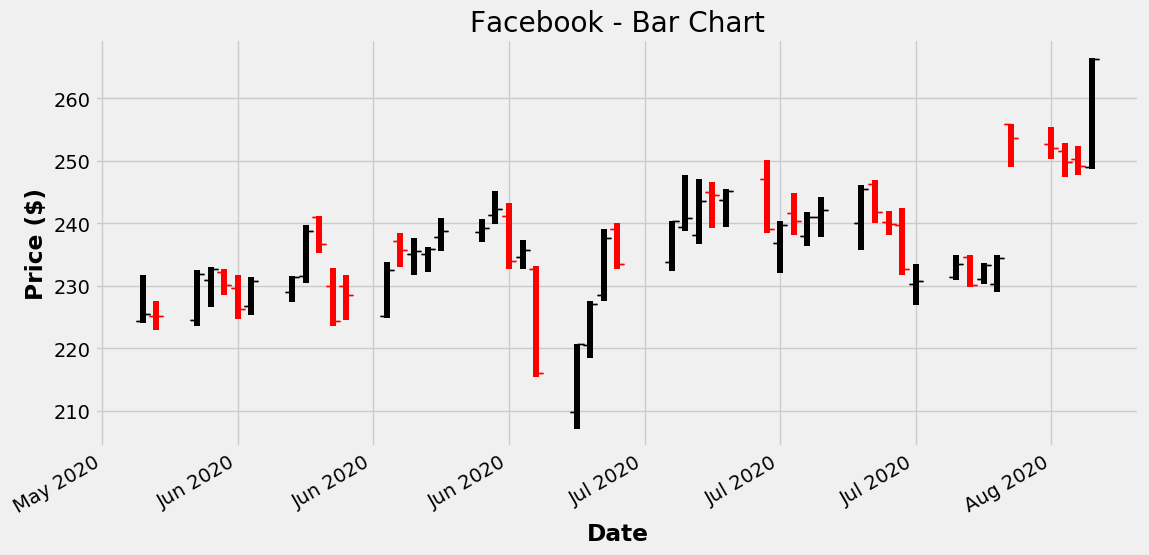

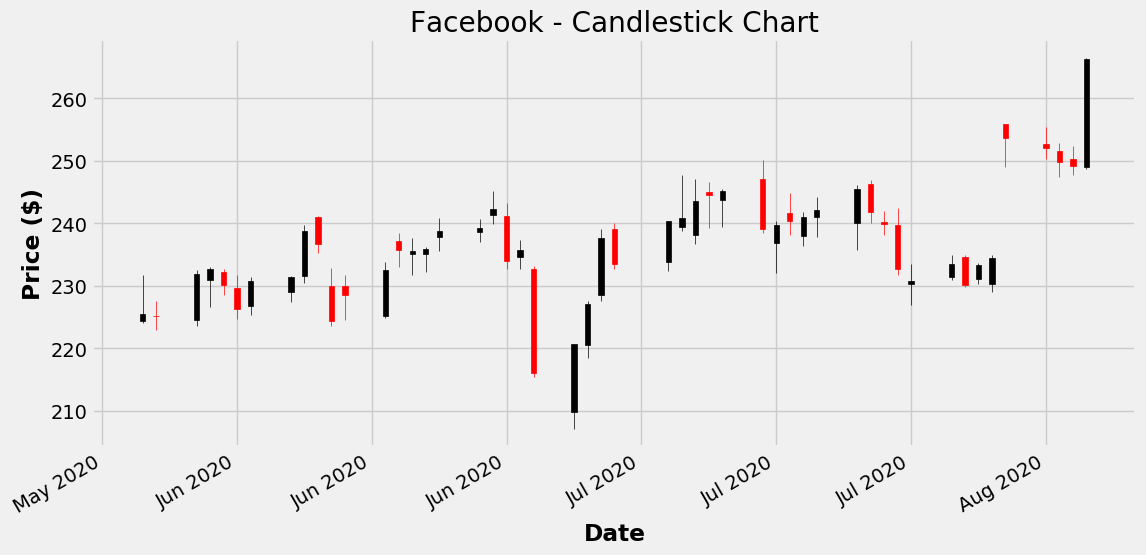

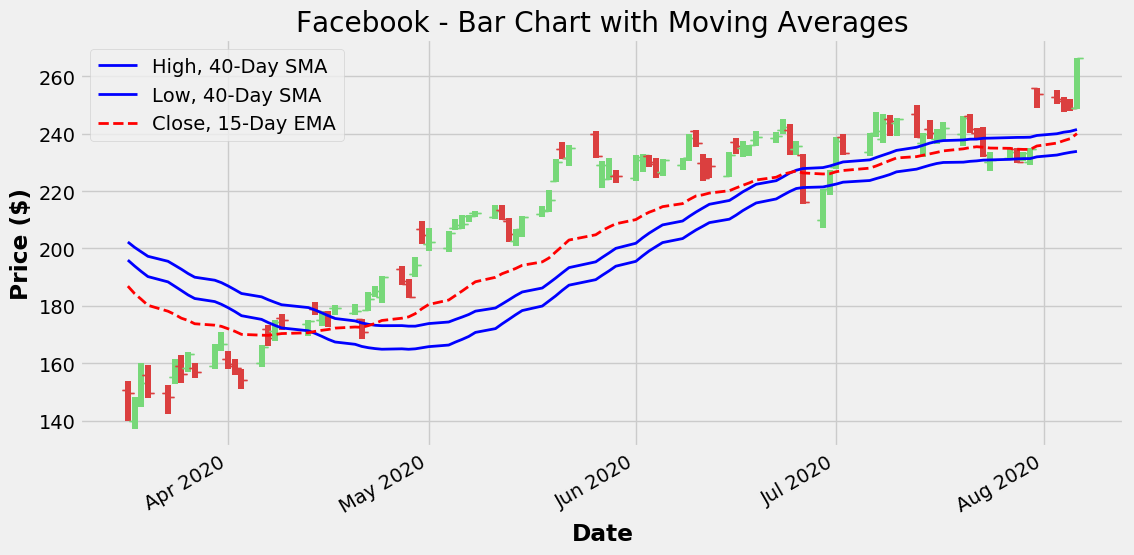

In [157]:
# Loading data into dataframe for Facebook (ticker = FB):
df = web.DataReader('FB', 'yahoo', start, end)
df.to_csv('fb.csv')
df = pd.read_csv('fb.csv', parse_dates = True, index_col = 'Date')

datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe for Facebook (ticker = FB):
datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

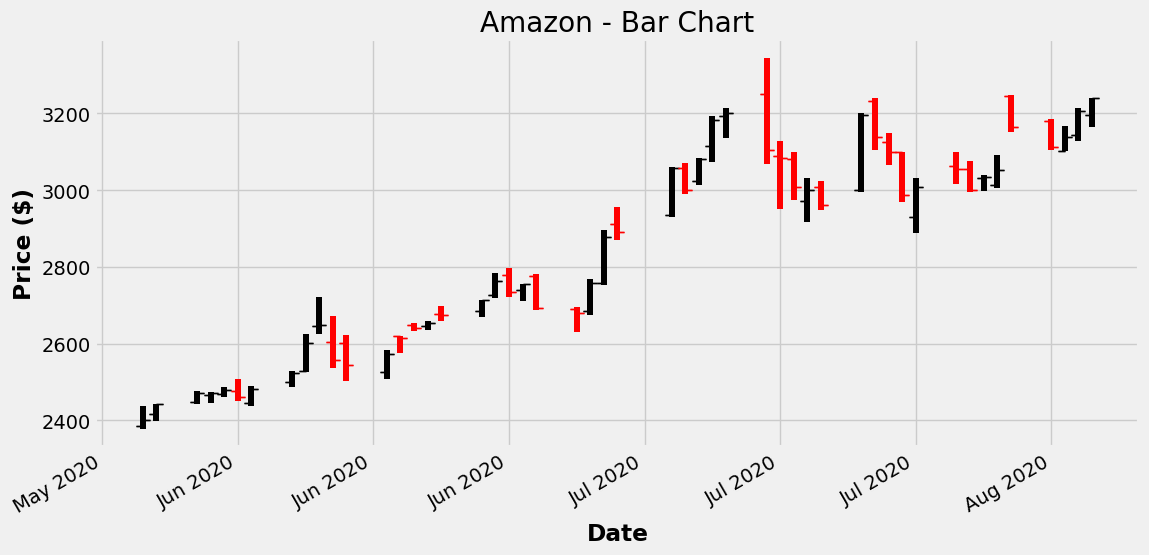

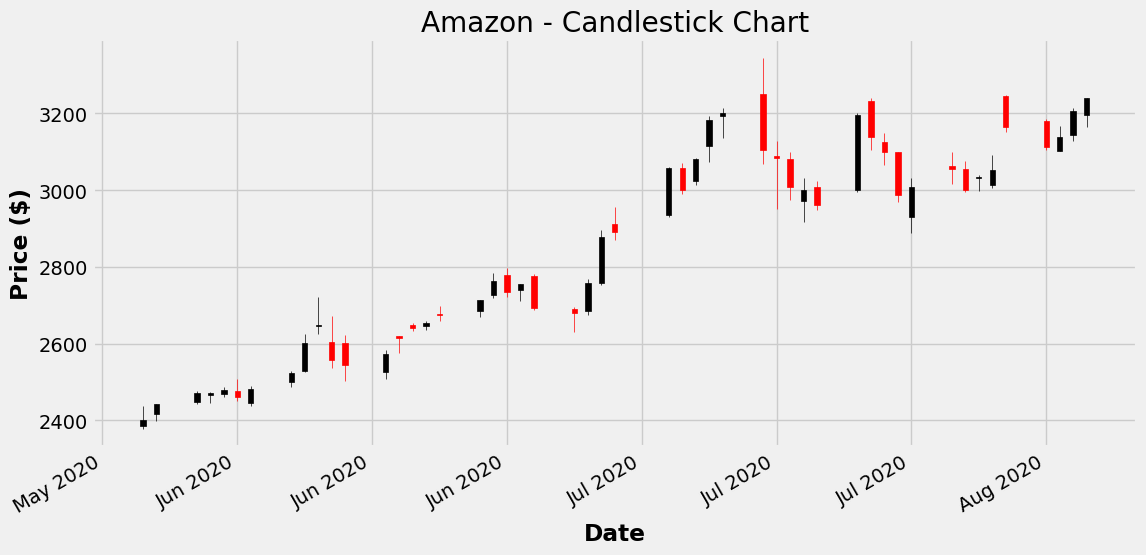

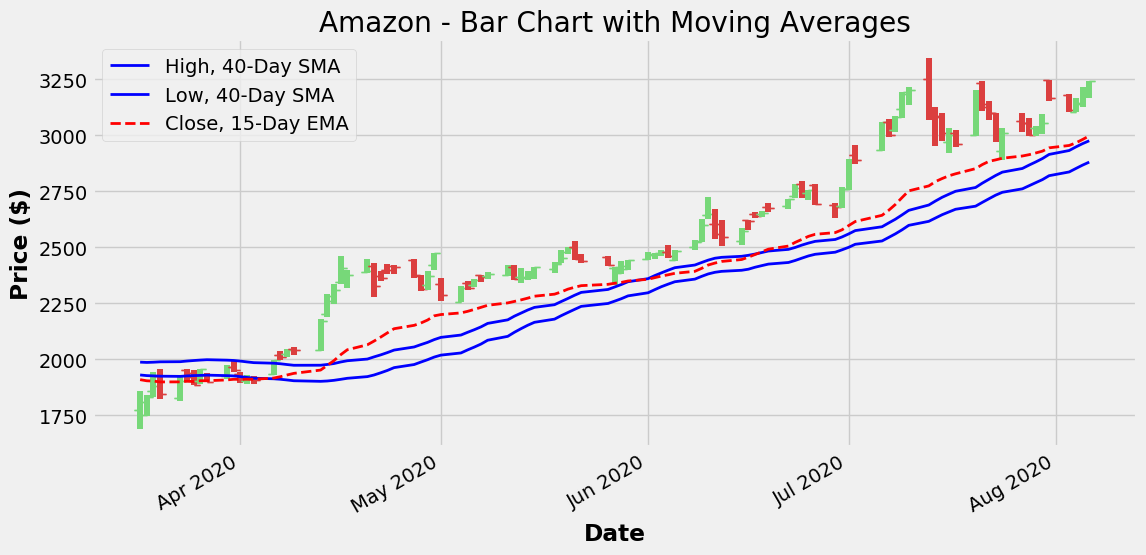

In [158]:
# Loading data into dataframe for Amazon (ticker = AMZN):
df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('amzn.csv')
df = pd.read_csv('amzn.csv', parse_dates = True, index_col = 'Date')

datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe (for Amazon, ticker = AMZN):
datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


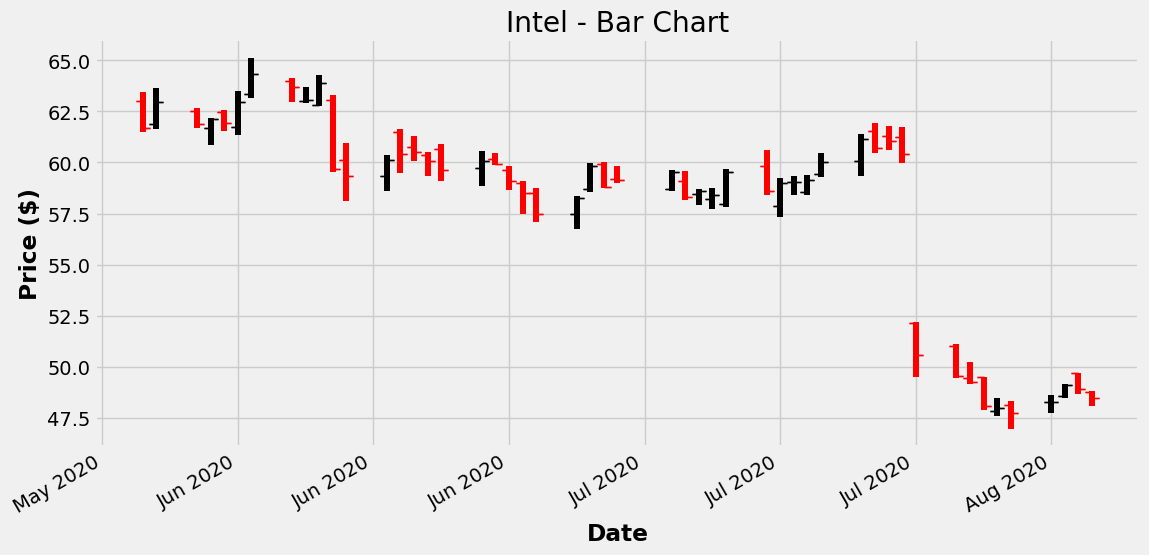

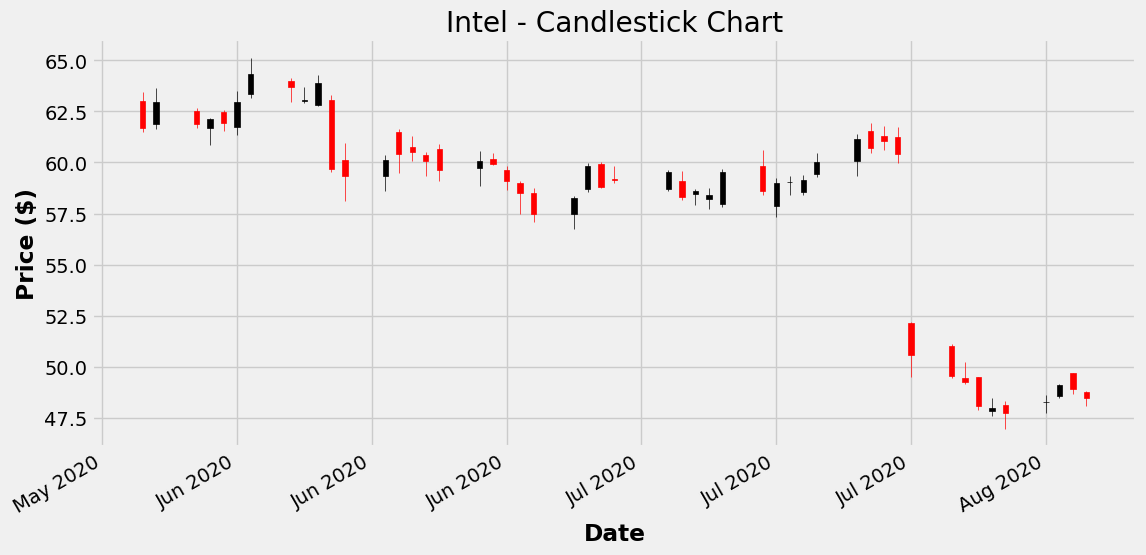

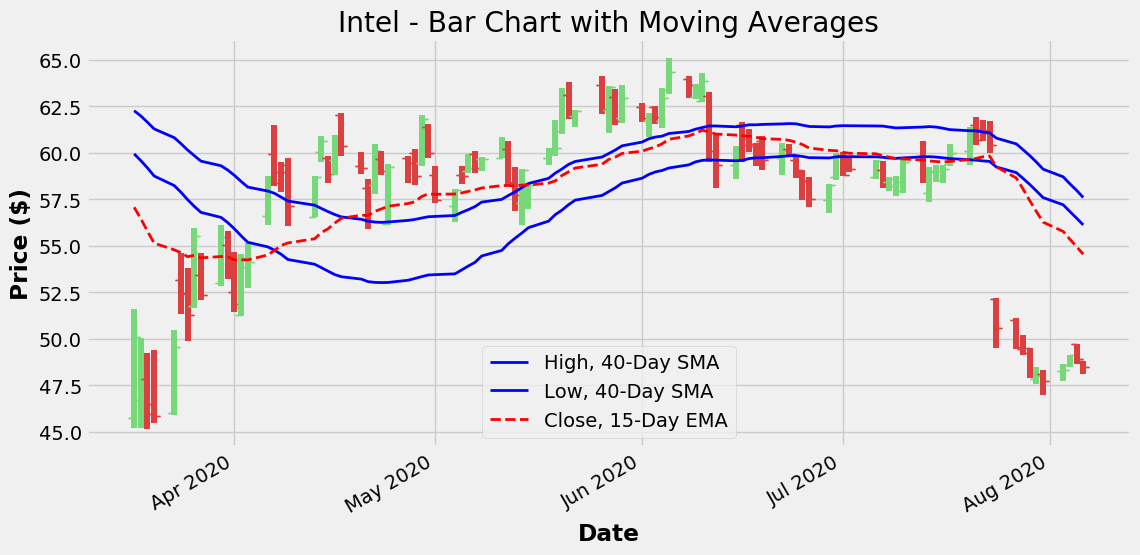

In [159]:
# Loading data into dataframe for Intel (ticker = INTC):
df = web.DataReader('INTC', 'yahoo', start, end)
df.to_csv('intc.csv')
df = pd.read_csv('intc.csv', parse_dates = True, index_col = 'Date')

datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe (for Intel, ticker = INTC):
datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

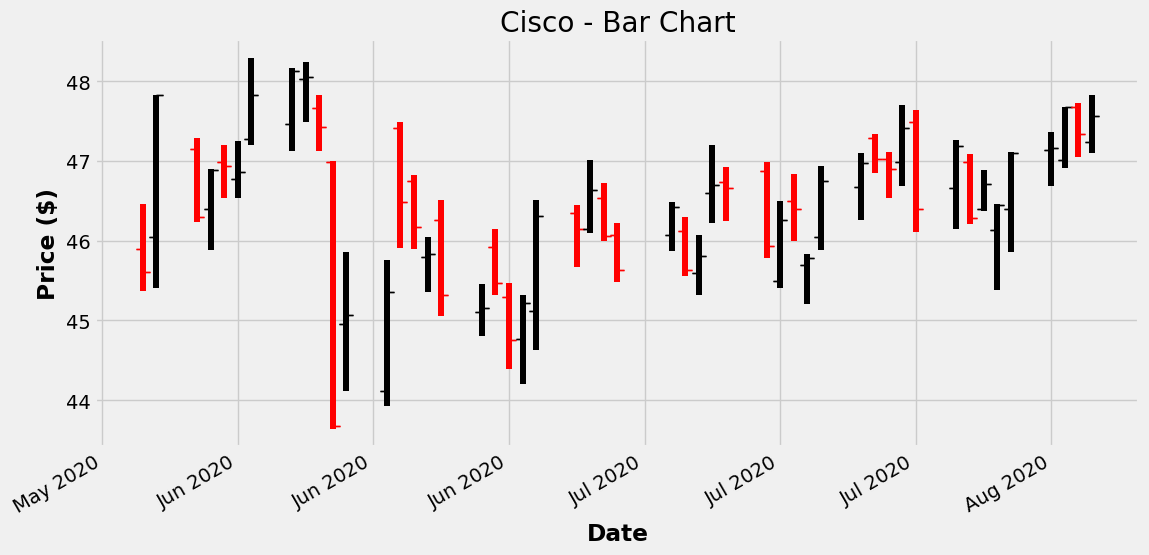

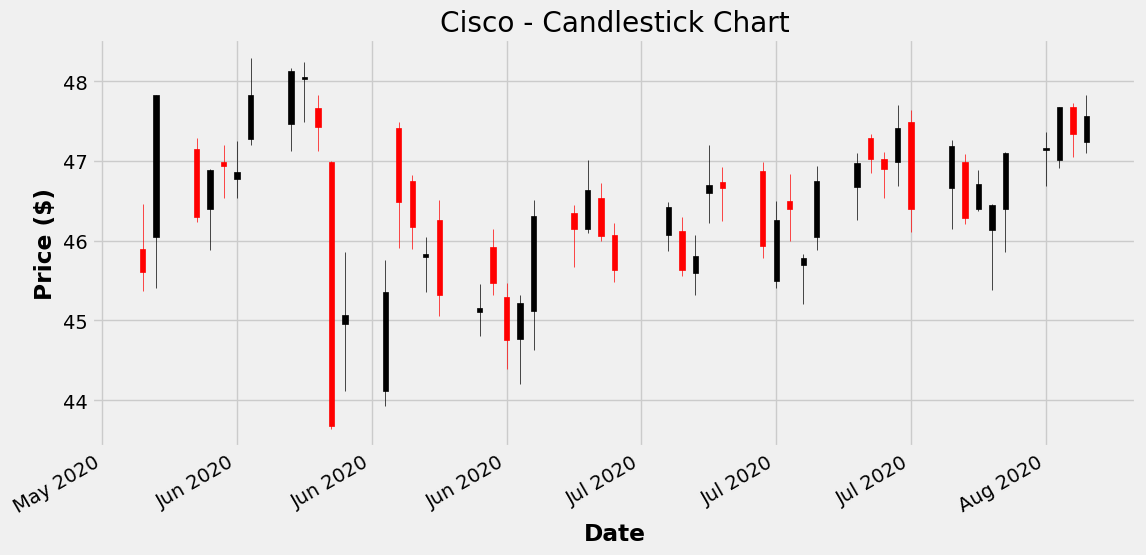

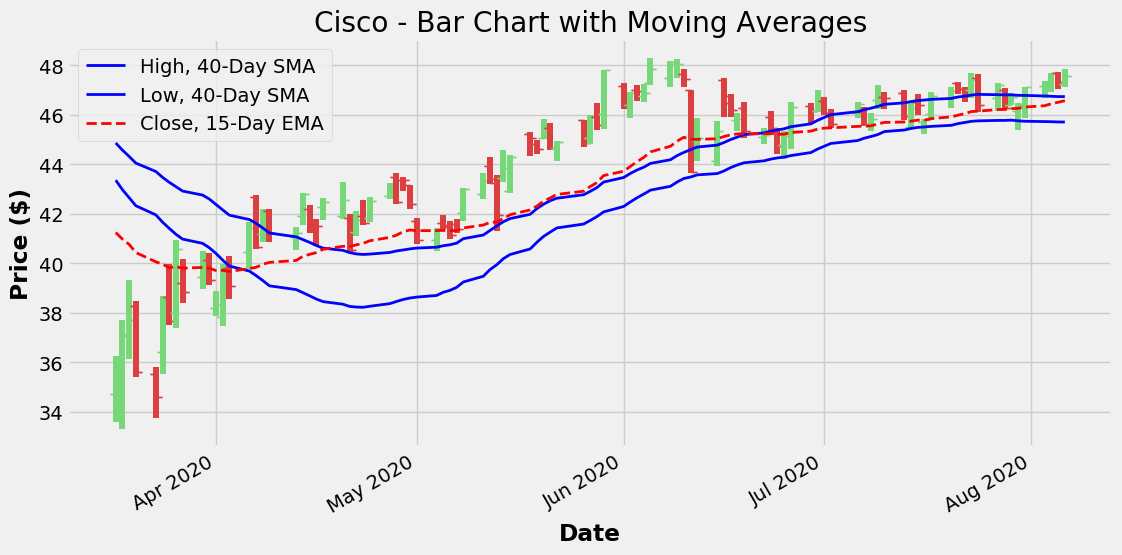

In [160]:
# Loading data into dataframe for Cisco (ticker = CSCO):
df = web.DataReader('CSCO', 'yahoo', start, end)
df.to_csv('csco.csv')
df = pd.read_csv('csco.csv', parse_dates = True, index_col = 'Date')

datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages: Loading data into dataframe - Cisco (CSCO):
datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


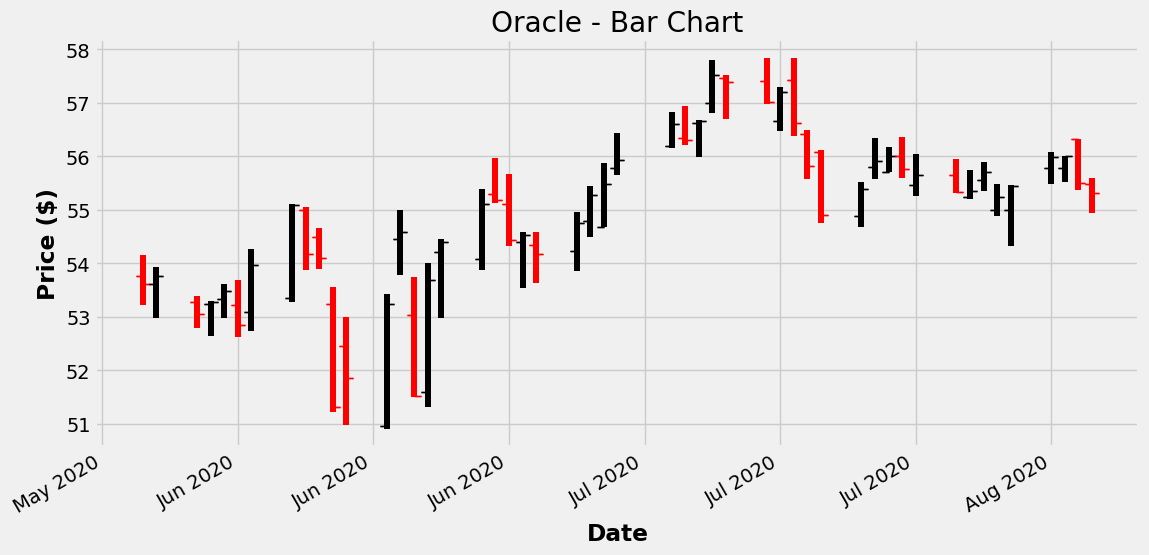

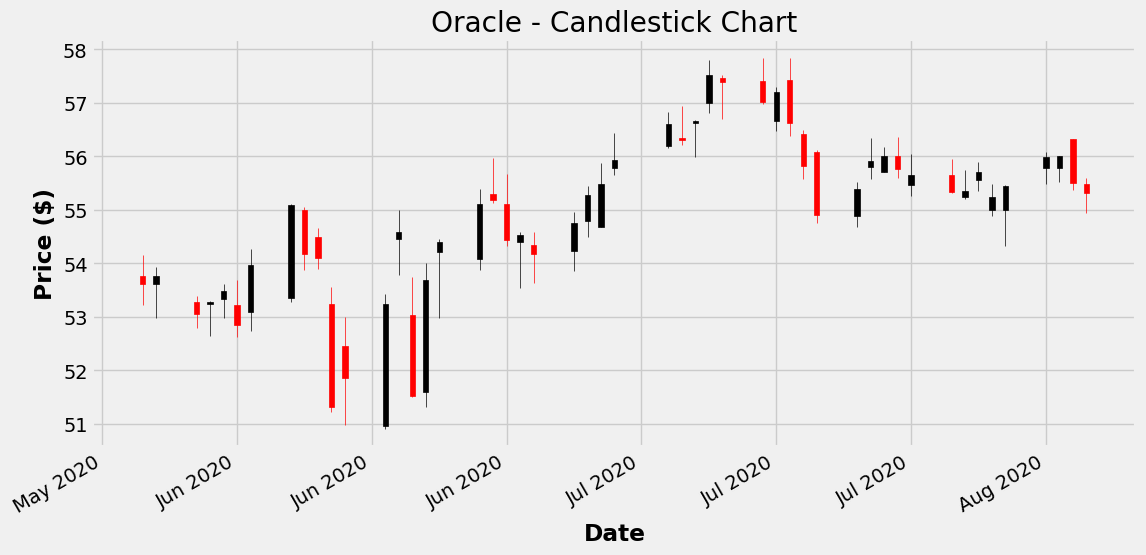

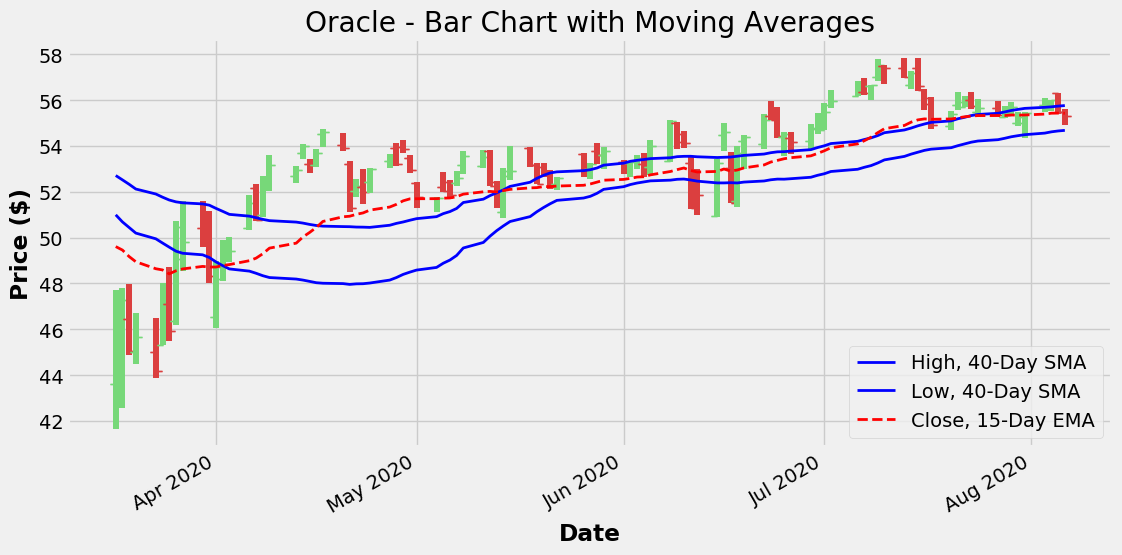

In [162]:
# Loading data into dataframe for Oracle (ticker = ORCL):
df = web.DataReader('ORCL', 'yahoo', start, end)
df.to_csv('orcl.csv')
df = pd.read_csv('orcl.csv', parse_dates = True, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe for Oracle (ticker = ORCL):
datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

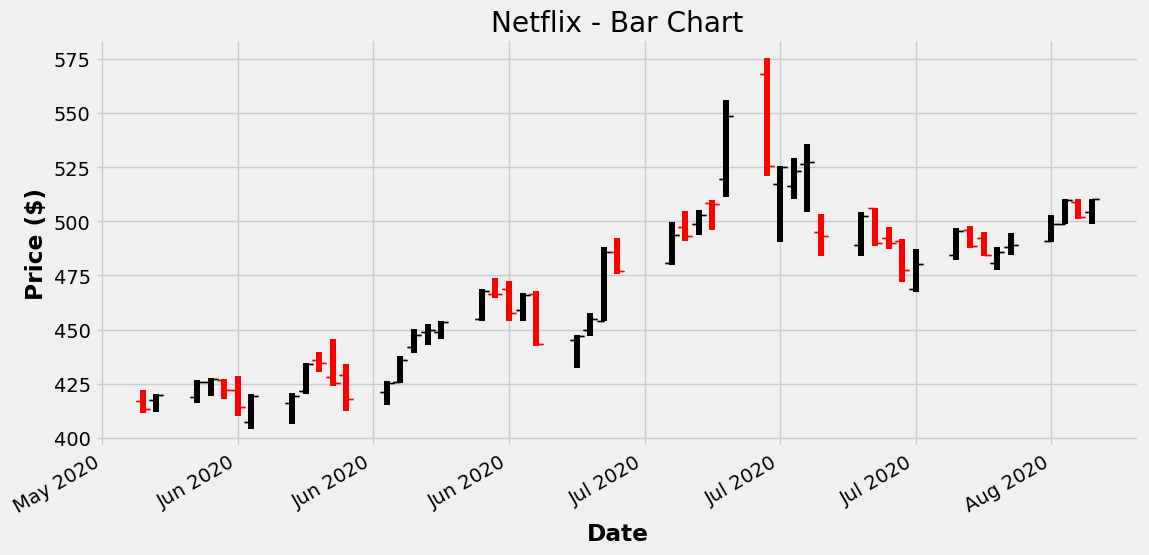

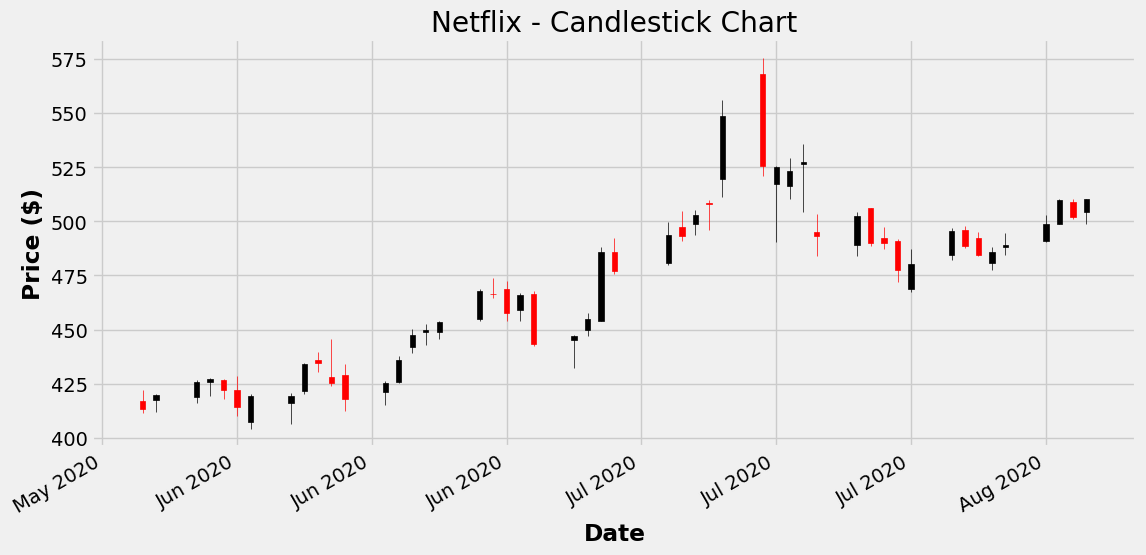

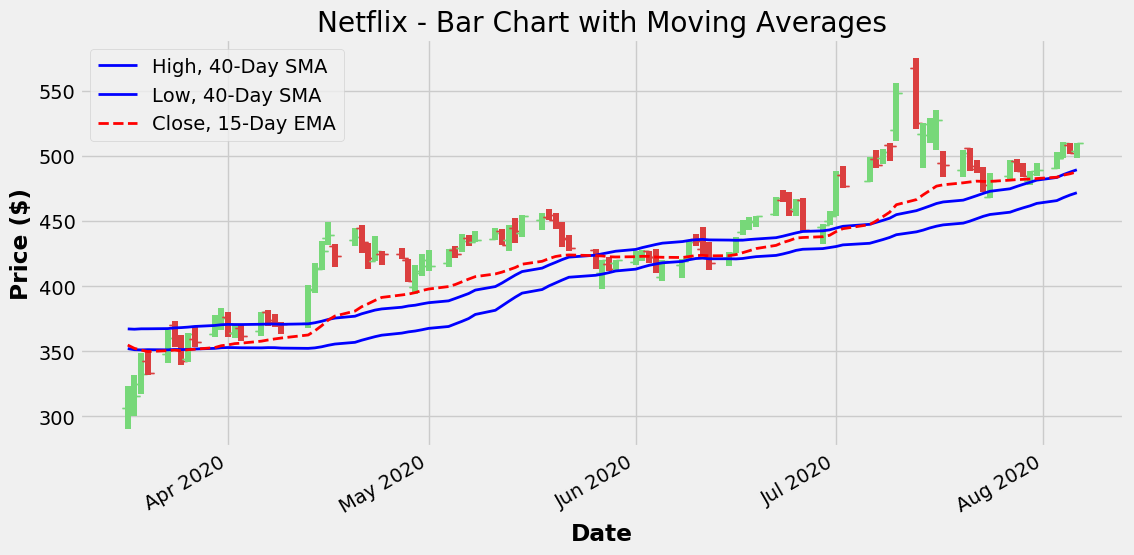

In [163]:
# Loading data into dataframe for Netflix (ticker = NFLX):
df = web.DataReader('NFLX', 'yahoo', start, end)
df.to_csv('nflx.csv')
df = pd.read_csv('nflx.csv', parse_dates = True, index_col = 'Date')

datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe for Netflix (ticker = NFLX):
datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


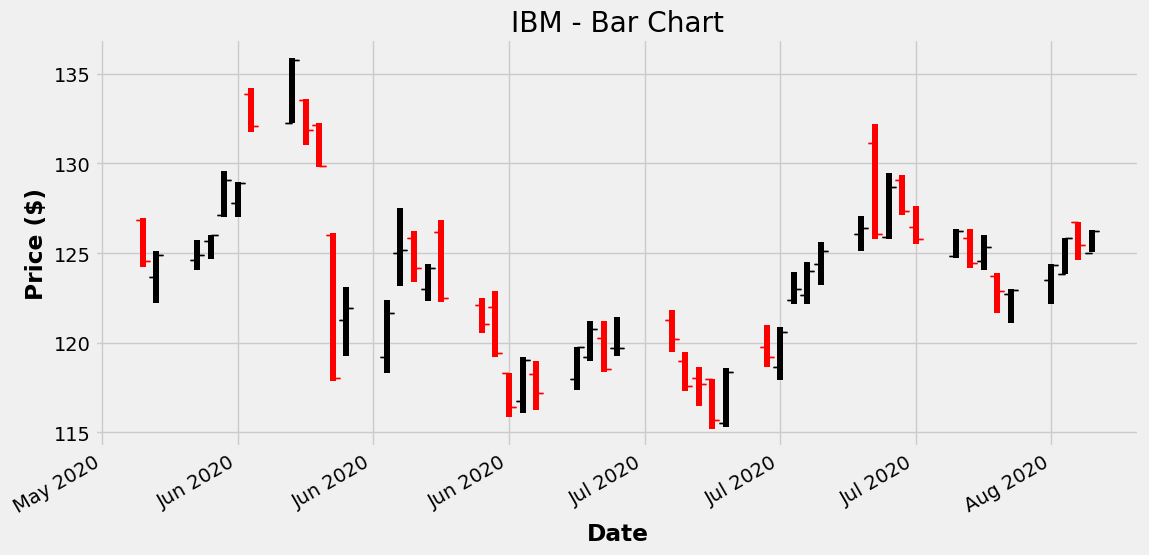

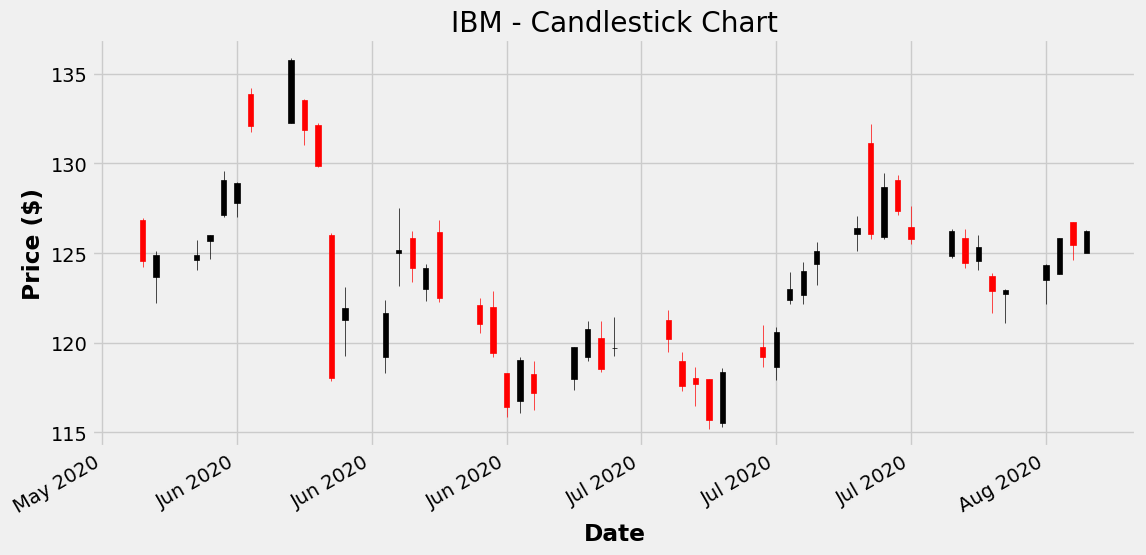

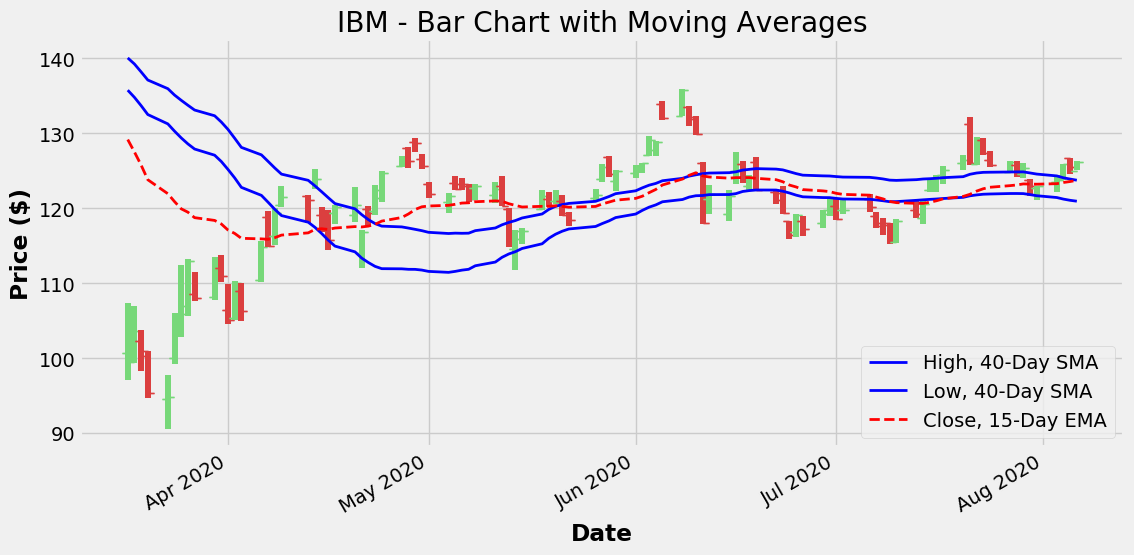

In [164]:
# Loading data into dataframe for IBM (ticker = IBM):
df = web.DataReader('IBM', 'yahoo', start, end)
df.to_csv('ibm.csv')
df = pd.read_csv('ibm.csv', parse_dates = True, index_col = 'Date')

datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

# Bar Chart with Moving Averages - Loading data into dataframe for IBM (ticker = IBM):
datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

In [ ]:
# Two simple moving averages (in blue) create channel:
# Compared to single moving average, 
# there is a gray zone when prices are neither above nor below the channel.
# One exmaple, would be to adopt trading rules such as:
# (1) Enter long positions (BUY) only when price bars completely above higher 40-Day SMA.
# (2) Enter short positions (SELL) only when price bars completely below lower 40-Day SMA.
# (3) Do not enter position (HOLD) - Keep flat on the market when prices between two 40-Day SMAs, 
# or last bar crossing either 40-Day SMA.

# Another example of trading strategy rules could include:
# (1) Enter long positions (BUY) only when 15-Day EMA > the higher 40-Day SMA.
# (2) Enter short positions (SELL) only when 15-Day EMA < the lower 40-Day SMA.
# (3) If else, stay flat (HOLD), for example, when 15-Day EMA is inside the channel created by two SMAs.

# Now, we can ask whether such trading rules could be used to build a profitable trading system. 
# Will such trading strategy rules help generate profits instead of lossess, and
# how to select best set of rules. 

# Next, backtest trading system to calculate P&L based on historical data.


# FUNDAMENTAL ANALYSIS
Another element for this project, or perhaps a separate project would include fundamental analysis, looking at financial statements from the SEC EDGAR website.


In [1]:
# Analyzing Financial Statements for Insight into Company's Valuation for Possible Investment
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MFT.NZ'
url = 'https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT'

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above

page = requests.get(url, headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want

tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element

tree.xpath("//h1/text()")

['Will be right back...']

In [166]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.

assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0            1            2  \
0                                 Breakdown    6/30/2020    6/30/2019   
1                              Total Assets  301,311,000  286,556,000   
2   Total Liabilities Net Minority Interest  183,007,000  184,226,000   
3      Total Equity Gross Minority Interest  118,304,000  102,330,000   
4                      Total Capitalization  177,882,000  168,992,000   
5                       Common Stock Equity  118,304,000  102,330,000   
6                 Capital Lease Obligations    7,671,000    6,188,000   
7                       Net Tangible Assets   67,915,000   52,554,000   
8                           Working Capital  109,605,000  106,132,000   
9                          Invested Capital  181,631,000  174,508,000   
10                      Tangible Book Value   67,915,000   52,554,000   
11                               Total Debt   70,998,000   78,366,000   
12                                 Net Debt   49,751,000   60,822,000   
13                             Share Issued    7,571,000    7,643,000   
14                   Ordinary Shares Number    7,571,000    7,643,000   

              3            4  
0     6/30/2018    6/30/2017  
1   258,848,000  241,086,000  
2   176,130,000  168,692,000  
3    82,718,000   72,394,000  
4   154,960,000  148,467,000  
5    82,718,000   72,394,000  
6     5,568,000          NaN  
7    38,982,000   27,166,000  
8   111,174,000   95,324,000  
9   158,958,000  158,588,000  
10   38,982,000   27,166,000  
11   81,808,000   86,194,000  
12   64,294,000   78,531,000  
13    7,677,000    7,708,000  
14    7,677,000    7,708,000